# Final Project - DEEP Reinforcements Learning
---
<br>

<br><br>
<img src="https://raw.githubusercontent.com/Farama-Foundation/Minigrid/master/minigrid-text.png">

# Using Proximal Policy Optimization - PPO Agent

## Pre-Requisit

## Installs

In [ ]:
pip install opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/63.0 MB ? eta -:--:--
   ━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/63.0 MB 83.3 MB/s eta 0:00:01
   ━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/63.0 MB 140.3 MB/s eta 0:00:01
   ━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/63.0 MB 212.4 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━ 24.4/63.0 MB 216.4 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━ 31.3/63.0 MB 204.7 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━ 38.4/63.0 MB 204.6 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━ 45.5/63.0 MB 209.8 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━ 52.6/63.0 MB 209.6 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━ 60.0/63.0 MB 210.6 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 63.0/63.0 MB 216.4 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 63.0/63.0 MB 216.4 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 63.0/63.0

In [ ]:
%%capture
!sudo apt-get update
!sudo apt-get install -y xvfb ffmpeg freeglut3-dev
!pip install 'imageio==2.4.0'
!apt-get install python-opengl -y
!apt install xvfb -y
!pip install pyvirtualdisplay
!pip install piglet
!pip install gymnasium
!apt-get install python-opengl -y
!apt install xvfb -y
!pip install -U --no-cache-dir gdown --pre
!pip install minigrid
!wget -q https://www.dropbox.com/scl/fi/jhkb2y3jw8wgin9e26ooc/MiniGrid-MultiRoom-N6-v0_vid.mp4?rlkey=qtkrmmbk9aiote5z7w4bx6ixi&st=zbr4gk21&dl=1 -O content/MiniGrid-MultiRoom-N6-v0_vid.mp4


## Imports

In [ ]:
import base64
import IPython
import numpy as np
import gymnasium as gym
import minigrid
from minigrid.wrappers import RGBImgPartialObsWrapper, ImgObsWrapper
# import imageio.v2 as imageio

In [ ]:
from pyvirtualdisplay import Display
from IPython.display import HTML
from IPython import display as ipythondisplay
import pyvirtualdisplay
import IPython
import base64
import gymnasium
import minigrid
from minigrid.wrappers import RGBImgObsWrapper, RGBImgPartialObsWrapper, ImgObsWrapper, FullyObsWrapper, RGBImgPartialObsWrapper
import matplotlib.pyplot as plt
import imageio
import numpy as np
import cv2

In [ ]:
# Constants for the environemnt configuration do no change the values
highlight = False
render_mode = "rgb_array"

## Display utils
The cell below contains the video display configuration. No need to make changes here.

In [ ]:
def embed_mp4(filename):
  """Embeds an mp4 file in the notebook."""
  video = open(filename,'rb').read()
  b64 = base64.b64encode(video)
  tag = '''
  <video width="640" height="480" controls>
    <source src="data:video/mp4;base64,{0}" type="video/mp4">
  Your browser does not support the video tag.
  </video>'''.format(b64.decode())

  return IPython.display.HTML(tag)
#display = pyvirtualdisplay.Display(visible=0, size=(1400, 900)).start()

# Introduction

For this project, you will work with environments from the [MiniGrid](https://minigrid.farama.org) framework. MiniGrid is designed to test and benchmark reinforcement learning algorithms, offering a diverse range of tasks with varying levels of complexity.

MiniGrid environments are built around the concept of a partially observable, grid-based world where an agent operates to achieve predefined objectives.

## **MultiRoom Environment**

You will work with the **MultiRoom Environment** see docomentation [here](https://minigrid.farama.org/environments/minigrid/MultiRoomEnv/). MultiRoomEnv introduces a level of complexity beyond simple navigation tasks by requiring the agent to navigate through multiple connected rooms to reach a goal. This environment is an excellent testbed for reinforcement learning algorithms that require exploration, memory, and planning.



## Understanding the `done` and `truncated` Mechanisms in MultiRoomEnv

As you experienced in the MidTerm assignment, the **GYM** API returns multiple outputs from the **`step`** method. In the MultiRoomEnv environment, two key mechanisms, **`done`** and **`truncated`**, are used to signify the end of an episode. These mechanisms are essential for managing the flow of training and providing valuable feedback about the agent's performance.


### `done`
- The `done` flag is set to `True` when the agent successfully reaches the goal.
- It indicates the successful termination of the episode, meaning the agent has completed the task.
- Example scenario: The agent navigates through all the rooms and reaches the green goal square in the final room.

### `truncated`
- The `truncated` flag is used to terminate an episode when a predefined condition is met, such as exceeding the maximum number of steps allowed.
- It does not necessarily indicate success or failure, but rather ensures that episodes do not run indefinitely.
- Example scenario: The agent fails to reach the goal within the allowed number of steps, and the episode ends prematurely.

**Pay Attention!**

Each time the environment is reset, the configuration of the rooms is randomized. This variability should be carefully considered during training, as resetting the environment every time the `max_step` limit is reached can make it challenging for the agent to learn effectively.

Additionally, note that the `max_step` parameter is defined as the number of rooms multiplied by 20.


## Random Action Rendering

In [ ]:
env = gymnasium.make("MiniGrid-MultiRoom-N6-v0", render_mode=render_mode, highlight=highlight)
video_filename = 'vid_ex_1.mp4'
truncated = False
# Evaluation
with imageio.get_writer(video_filename, fps=16) as video:
  obs, _ = env.reset()
  done = False
  total_reward = 0
  step = 0
  while not truncated:
      action = env.action_space.sample()
      obs, reward, done, truncated  , _ = env.step(action)
      next_obs = obs  # Get agent's position directly from the environment
      video.append_data(env.render())
      step += 1
      if truncated:
        print("done","reward=", total_reward,"num_of_steps=",step)
        break
embed_mp4(video_filename)

done reward= 0 num_of_steps= 120


## Wrappers for Observations: ImgObsWrapper and RGBImgPartialObsWrapper

For this project, you will use two wrappers provided by MiniGrid: **ImgObsWrapper** and **RGBImgPartialObsWrapper**. These wrappers modify the agent's observations.

### ImgObsWrapper
- The **ImgObsWrapper** converts the observation from its default dictionary format into a single image array.
- By default, observations in MiniGrid are returned as a dictionary containing both image data and other optional keys (e.g., mission strings). This wrapper extracts only the image component for simplicity.

### RGBImgPartialObsWrapper
- This wrapper provides a **partial view of the environment**, but instead of limiting it to a fixed field of view, it shows the **entire visible content of the current room** from the agent's position to the walls in the direction the agent is facing.
- The observation dynamically updates as the agent moves or turns, allowing it to see the layout of the room but not beyond its walls or through closed doors.
- This introduces the challenge of **partial observability across multiple rooms**, as the agent must explore and navigate to new rooms to gather more information about the environment.





### Wrapper Usage
To apply a wrapper, you can modify your environment setup as follows:

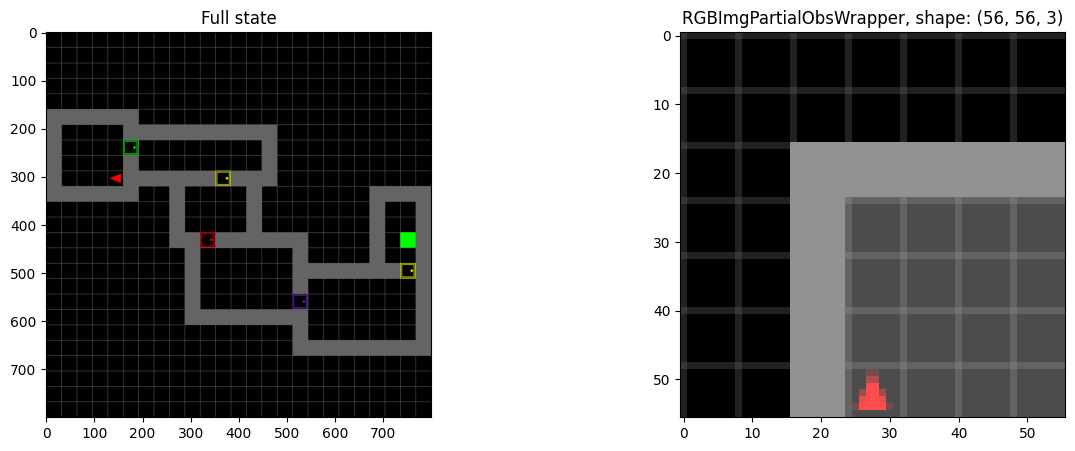

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
env = gymnasium.make("MiniGrid-MultiRoom-N6-v0", render_mode=render_mode, highlight=highlight)
env = RGBImgPartialObsWrapper(env)
env = ImgObsWrapper(env)
obs, _ = env.reset()
axs[1].imshow(obs)
axs[1].title.set_text(f'RGBImgPartialObsWrapper, shape: {obs.shape}')
axs[0].imshow(env.render())
axs[0].title.set_text(f'Full state')
plt.show()

## Initializing the smaller environments

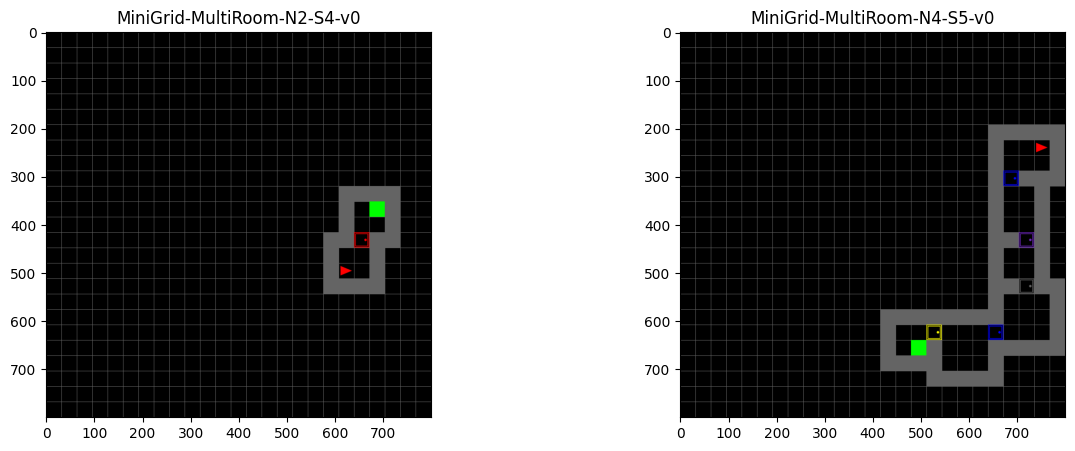

In [ ]:
env = gymnasium.make("MiniGrid-MultiRoom-N2-S4-v0", render_mode=render_mode, highlight=highlight)
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
env = RGBImgPartialObsWrapper(env)
env = ImgObsWrapper(env)
obs, _ = env.reset()
axs[0].imshow(env.render())
axs[0].title.set_text(f'MiniGrid-MultiRoom-N2-S4-v0')



env = gymnasium.make("MiniGrid-MultiRoom-N4-S5-v0", render_mode=render_mode, highlight=highlight)
env = RGBImgPartialObsWrapper(env)
env = ImgObsWrapper(env)
obs, _ = env.reset()
axs[1].imshow(env.render())
axs[1].title.set_text(f'MiniGrid-MultiRoom-N4-S5-v0')
plt.show()

### Partial Observation Example

In [ ]:
env = gymnasium.make("MiniGrid-MultiRoom-N6-v0", render_mode=render_mode, highlight=highlight)
env = RGBImgPartialObsWrapper(env)
env = ImgObsWrapper(env)
video_filename = 'vid_partial_ex_1.mp4'
truncated = False
# Evaluation
with imageio.get_writer(video_filename, fps=10) as video:
  obs, _ = env.reset()
  done = False
  total_reward = 0
  step = 0
  while not truncated:
      action = env.action_space.sample()
      obs, reward, done, truncated  , _ = env.step(action)
      next_obs = obs  # Get agent's position directly from the environment
      video.append_data(obs)
      step += 1
      if truncated:
        print("done","reward=", total_reward,"num_of_steps=",step)
        break
embed_mp4(video_filename)

done reward= 0 num_of_steps= 120


## Exmple from our solution

In [ ]:
# Step 1: Correct download path
# Call the function
embed_mp4('MiniGrid-MultiRoom-N6-v0_vid.mp4?rlkey=qtkrmmbk9aiote5z7w4bx6ixi')


# Your Code here ...

#PPO Implementation

##Algorithm Selection

PPO (Proximal Policy Optimization) Algorithm
For this project, We've implemented the Proximal Policy Optimization (PPO) algorithm to solve the MiniGrid-MultiRoom environments.
PPO was selected for several key reasons that make it particularly well-suited for this task and also quite common in solving similar tasks in other cased we've encountered online.

PPO is particularly suitable for the MultiRoom environment for several reasons:

1. **Sample Efficiency**: PPO makes multiple optimization passes over the same trajectory data, extracting more learning signal from each environment interaction.
2. **Stability**: The clipping mechanism prevents destructively large policy updates, which is crucial for environments with complex navigation requirements like MultiRoom.
3. **Continuous Learning**: PPO allows for incremental policy improvement, making it suitable for the curriculum learning approach I employed (starting with simpler environments and progressing to more complex ones).
4. **Balancing Exploration and Exploitation**: Through entropy regularization, PPO naturally balances exploration and exploitation, which is essential for finding doorways between rooms in partially observable environments.

##Algorithm Overview
PPO is a policy gradient method that addresses the challenge of determining appropriate step sizes when performing policy updates. It introduces a clipped objective function that restricts the size of policy updates, preventing excessively large changes that could destabilize training:


$$L^{CLIP}(\theta) = \hat{E}_t[\min(r_t(\theta)\hat{A}_t, \text{clip}(r_t(\theta), 1-\epsilon, 1+\epsilon)\hat{A}_t)]$$

$r_t(\theta)$ -is the ratio of the probability of taking action $a_t$ under the new policy vs. the old policy

$\hat{A}_t$ -is the estimated advantage

$\epsilon$ -is a hyperparameter that controls the clipping boundary (typically 0.1 or 0.2)

* (in our case was even lower for initial exploration in the small room for gradual learning).

# Training Environment Setup and Helper Functions


In [ ]:
# Save trained agent with timestamp (Israel timezone)
import pytz
from datetime import datetime

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import base64
from IPython.display import HTML
import imageio
import gymnasium as gym
from gymnasium.wrappers import RecordVideo

# Create helper function for environment setup
def make_env(env_id="MiniGrid-MultiRoom-N2-S4-v0", seed=None, use_door_wrapper=True,
             step_penalty=-0.001, door_bonus=3.0, goal_bonus=10.0,
             render_mode="rgb_array", limit_actions=True, use_smart_wrapper=True):
    """
    Create and wrap a MiniGrid environment
    """
    # Create the environment
    env = gym.make(env_id, render_mode=render_mode)

    # Apply the door crossing wrapper if specified
    if use_door_wrapper:
        if use_smart_wrapper:
            # Use the improved smart door crossing wrapper
            env = SmartDoorCrossingWrapper(env, step_penalty=step_penalty,
                                           door_bonus=door_bonus, goal_bonus=goal_bonus)
        else:
            # Use the original door crossing wrapper
            env = DoorCrossingRewardWrapper(env, step_penalty=step_penalty, door_bonus=door_bonus)

    # Apply image wrappers for partial observability
    env = RGBImgPartialObsWrapper(env)  # Get pixel observations
    env = ImgObsWrapper(env)  # Convert dict to image array

    # Apply action limitation wrapper if specified
    if limit_actions:
        env = LimitedActionWrapper(env)

    # Set the seed if provided
    if seed is not None:
        env.reset(seed=seed)

    return env

# Embed videos in the notebook
def embed_mp4(filename):
    """Embeds an mp4 file in the notebook."""
    try:
        video = open(filename, 'rb').read()
        b64 = base64.b64encode(video)
        tag = '''
        <video width="640" height="480" controls>
            <source src="data:video/mp4;base64,{0}" type="video/mp4">
            Your browser does not support the video tag.
        </video>'''.format(b64.decode())
        return HTML(tag)
    except Exception as e:
        print(f"Error embedding video: {e}")
        return None

# Record agent performance
def record_agent_video(agent, env_id="MiniGrid-MultiRoom-N2-S4-v0",
                       video_path="Agent-Experiment/agents_videos/agent_performance.mp4",
                       max_steps=500):
    """
    Record a video of the agent's performance
    """
    # Add timestamp to filename (Israel timezone)
    import pytz
    from datetime import datetime

    # Create Israel timezone
    tz_israel = pytz.timezone('Asia/Jerusalem')
    current_time = datetime.now(tz_israel).strftime("%Y-%m-%d-%H-%M-%S")

    # Add timestamp to filename
    filename_parts = os.path.splitext(video_path)
    video_path = f"{filename_parts[0]}_{current_time}{filename_parts[1]}"

    # Create environment with recording wrapper
    video_dir = os.path.dirname(video_path)
    if not os.path.exists(video_dir) and video_dir:
        os.makedirs(video_dir)

    env = gym.make(env_id, render_mode="rgb_array")
    env = DoorCrossingRewardWrapper(env)
    env = RGBImgPartialObsWrapper(env)
    env = ImgObsWrapper(env)
    env = RecordVideo(
        env,
        video_folder=video_dir,
        name_prefix=os.path.basename(video_path).split('.')[0],
        episode_trigger=lambda episode_id: True
    )

    # Run a single episode with the agent
    obs, _ = env.reset()
    total_reward = 0
    done = False
    truncated = False
    frames = []

    for step in range(max_steps):
        # Convert observation format for agent
        if isinstance(obs, np.ndarray):
            state = np.transpose(obs, (2, 0, 1))  # HWC to CHW
        else:
            state = np.transpose(obs["image"], (2, 0, 1))

        # Get action from agent
        action, _, _ = agent.select_action(state)

        # Take action
        obs, reward, done, truncated, _ = env.step(action)
        total_reward += reward

        # Render frame
        frames.append(env.render())

        if done or truncated:
            break

    env.close()
    print(f"Episode finished with total reward: {total_reward}")
    print(f"Video saved to {video_path}")

    return video_path

# Plot training metrics with Plotly Express
def plot_training_metrics(rewards, success_rates, title_prefix="Training Results"):
    """
    Plot training rewards and success rates using Plotly Express
    """
    import plotly.express as px
    from plotly.subplots import make_subplots
    import plotly.graph_objects as go

    # Create episodes array
    episodes = list(range(1, len(rewards) + 1))

    # Create subplots
    fig = make_subplots(rows=1, cols=2,
                        subplot_titles=([f"{title_prefix} - Rewards",
                                         f"{title_prefix} - Success Rate"]))

    # Add reward trace
    fig.add_trace(
        go.Scatter(x=episodes, y=rewards, mode='lines', name='Reward',
                  line=dict(color='royalblue')),
        row=1, col=1
    )

    # Add success rate trace
    fig.add_trace(
        go.Scatter(x=episodes, y=success_rates, mode='lines', name='Success Rate (%)',
                  line=dict(color='green')),
        row=1, col=2
    )

    # Update layout
    fig.update_layout(height=500, width=1000,
                      showlegend=False,
                      title_text=f"{title_prefix} Training Performance")

    fig.update_xaxes(title_text="Episodes", row=1, col=1)
    fig.update_xaxes(title_text="Episodes", row=1, col=2)
    fig.update_yaxes(title_text="Total Reward", row=1, col=1)
    fig.update_yaxes(title_text="Success Rate (%)", row=1, col=2)

    return fig

# Calculate success rate over a window
def calculate_success_rate(success_flags, window_size=100):
    """
    Calculate success rate over a sliding window
    """
    success_rates = []
    for i in range(len(success_flags)):
        if i < window_size:
            # For the first window_size episodes, compute from the beginning
            rate = 100 * np.mean(success_flags[:i+1])
        else:
            # For later episodes, use the sliding window
            rate = 100 * np.mean(success_flags[i-window_size+1:i+1])
        success_rates.append(rate)
    return success_rates

# Implementing PPO Agent

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import random
import gymnasium as gym
import minigrid
from minigrid.wrappers import RGBImgPartialObsWrapper, ImgObsWrapper
from gymnasium import Wrapper
import matplotlib.pyplot as plt
import plotly.express as px

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [ ]:
from gymnasium import spaces

class LimitedActionWrapper(gym.ActionWrapper):
    """
    Wrapper to limit the action space to only necessary actions.
    For MiniGrid navigation, we need:
    - 0: Turn left
    - 1: Turn right
    - 2: Move forward
    - 5: Toggle (for opening doors)

    We can remove:
    - 3: Pickup
    - 4: Drop
    - 6: Done
    """
    def __init__(self, env):
        super().__init__(env)
        # Map original actions to new action space
        self.action_map = {
            0: 0,  # Left
            1: 1,  # Right
            2: 2,  # Forward
            3: 5   # Toggle (was originally at index 5)
        }
        # Define new action space
        self.action_space = spaces.Discrete(4)  # 4 actions: left, right, forward, toggle

    def action(self, act):
        # Convert from new action space to original action space
        return self.action_map[act]

In [ ]:
# Set seeds for reproducibility
def set_seeds(seed=42):
    np.random.seed(seed)
    random.seed(seed)
    torch.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

In [ ]:

class SmartDoorCrossingWrapper(Wrapper):
    """
    Improved reward wrapper that:
    1. Tracks visited rooms to only give a door bonus when entering a new room
    2. Applies a small step penalty to encourage efficiency
    3. Preserves the goal reward for reaching the target

    This prevents the agent from repeatedly crossing the same door
    to farm rewards.
    """
    def __init__(self, env, step_penalty=-0.001, door_bonus=3.0, goal_bonus=10.0):
        super().__init__(env)
        self.step_penalty = step_penalty
        self.door_bonus = door_bonus
        self.goal_bonus = goal_bonus
        self.prev_cell = None
        self.visited_rooms = set()  # Track rooms the agent has visited
        self.current_room_id = None

    def _get_room_id(self):
        """
        Identify the current room by checking agent's coordinates.
        In MiniGrid, each room is a distinct region separated by walls/doors.
        We use a simple approximation based on agent position.
        """
        if not hasattr(self.unwrapped, 'agent_pos'):
            return None

        # Get current agent position
        x, y = self.unwrapped.agent_pos

        # Rooms in MultiRoom are typically rectangular regions
        # We can detect different rooms by checking significant changes in position
        # This is a simple heuristic and could be improved with more knowledge of the environment
        room_id = (x // 5, y // 5)  # Divide by grid size to get room identifier
        return room_id

    def reset(self, **kwargs):
        obs, info = self.env.reset(**kwargs)

        # Clear room tracking
        self.visited_rooms = set()
        self.prev_cell = None

        # Add initial room to visited set
        self.current_room_id = self._get_room_id()
        if self.current_room_id:
            self.visited_rooms.add(self.current_room_id)

        # Identify the cell the agent is currently standing on
        if hasattr(self.unwrapped, 'agent_pos'):
            x, y = self.unwrapped.agent_pos
            self.prev_cell = self.unwrapped.grid.get(x, y)

        return obs, info

    def step(self, action):
        # Take the action in the environment
        obs, reward, done, truncated, info = self.env.step(action)

        # Start with the original reward
        shaped_reward = reward

        # Add step penalty for efficiency (if not done)
        if not done:
            shaped_reward += self.step_penalty

        # If the agent reached the goal (original reward is positive), add bonus
        if reward > 0:
            shaped_reward += self.goal_bonus

        # Check if the agent crossed a door into a new room
        if hasattr(self.unwrapped, 'agent_pos'):
            x, y = self.unwrapped.agent_pos
            cell = self.unwrapped.grid.get(x, y)

            # Check if the agent is on a door
            if cell is not None and hasattr(cell, 'type') and cell.type == 'door':
                # Check if the agent wasn't previously on a door
                if self.prev_cell is None or self.prev_cell.type != 'door':
                    # Get the new room ID after potentially crossing a door
                    new_room_id = self._get_room_id()

                    # If the room ID changed and it's a new room, add the door bonus
                    if new_room_id and new_room_id != self.current_room_id and new_room_id not in self.visited_rooms:
                        shaped_reward += self.door_bonus
                        self.visited_rooms.add(new_room_id)
                        self.current_room_id = new_room_id

            # Update the previous cell
            self.prev_cell = cell

        return obs, shaped_reward, done, truncated, info

In [ ]:
# DoorCrossing Reward Wrapper - Encourages door exploration
class DoorCrossingRewardWrapper(Wrapper):
    """
    Adds a step penalty every time step (to encourage efficiency)
    and a bonus whenever the agent steps onto a door tile
    (encouraging it to move through doors).
    """
    def __init__(self, env, step_penalty=-0.001, door_bonus=3):
        super().__init__(env)
        self.step_penalty = step_penalty
        self.door_bonus = door_bonus
        self.prev_cell = None  # We'll track the previous cell

    def reset(self, **kwargs):
        obs, info = self.env.reset(**kwargs)
        # Identify the cell the agent is currently standing on
        self.prev_cell = None
        if hasattr(self.unwrapped, 'agent_pos'):
            x, y = self.unwrapped.agent_pos
            self.prev_cell = self.unwrapped.grid.get(x, y)
        return obs, info

    def step(self, action):
        obs, reward, done, truncated, info = self.env.step(action)

        # Start with the environment's reward, then add a step penalty
        shaped_reward = reward + self.step_penalty

        # Check if the agent's new position is a door
        if hasattr(self.unwrapped, 'agent_pos'):
            x, y = self.unwrapped.agent_pos
            cell = self.unwrapped.grid.get(x, y)

            if cell is not None and hasattr(cell, 'type') and cell.type == 'door':
                # If the agent wasn't previously on a door, award a bonus
                if self.prev_cell is None or (self.prev_cell.type != 'door'):
                    shaped_reward += self.door_bonus

            # Update the previous cell
            self.prev_cell = cell

        return obs, shaped_reward, done, truncated, info

In [ ]:
# Actor-Critic Network
class ActorCritic(nn.Module):
    def __init__(self, input_shape, num_actions):
        super(ActorCritic, self).__init__()

        # Improved CNN architecture
        self.conv = nn.Sequential(
            nn.Conv2d(input_shape[0], 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Flatten()
        )

        # Compute the output size after conv layers using a dummy input
        with torch.no_grad():
            dummy_input = torch.zeros(1, *input_shape)
            conv_out = self.conv(dummy_input)
            conv_out_size = conv_out.shape[1]

        # Shared feature extractor
        self.fc = nn.Sequential(
            nn.Linear(conv_out_size, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU()
        )

        # Actor head: outputs logits for each action
        self.actor = nn.Linear(128, num_actions)

        # Critic head: outputs state value estimate
        self.critic = nn.Linear(128, 1)

    def forward(self, x):
        # Normalize pixel values to [0,1]
        x = x / 255.0
        conv_out = self.conv(x)
        features = self.fc(conv_out)
        logits = self.actor(features)
        value = self.critic(features)
        return logits, value

In [ ]:
# PPO Agent implementation
class PPOAgent:
    def __init__(self, input_shape, num_actions, lr=3e-4, gamma=0.99, clip_epsilon=0.2,
                 update_epochs=10, batch_size=64, entropy_coef=0.01, value_coef=0.5,
                 max_grad_norm=0.5):
        self.gamma = gamma
        self.clip_epsilon = clip_epsilon
        self.update_epochs = update_epochs
        self.batch_size = batch_size
        self.entropy_coef = entropy_coef
        self.value_coef = value_coef
        self.max_grad_norm = max_grad_norm

        self.model = ActorCritic(input_shape, num_actions).to(device)
        self.optimizer = optim.Adam(self.model.parameters(), lr=lr, eps=1e-5)

    def select_action(self, state):
        """
        Select an action using the policy network
        """
        state = torch.FloatTensor(state).unsqueeze(0).to(device)
        with torch.no_grad():
            logits, value = self.model(state)
            probs = torch.softmax(logits, dim=-1)
            dist = torch.distributions.Categorical(probs)
            action = dist.sample()
            log_prob = dist.log_prob(action)
        return action.item(), log_prob.item(), value.item()

    def compute_returns(self, rewards, terminals, last_value, use_gae=True, gae_lambda=0.95):
        """
        Compute returns using Generalized Advantage Estimation (GAE)
        """
        rewards = np.array(rewards)
        terminals = np.array(terminals)
        values = np.array([t[5] for t in self.trajectories])

        # Append the last value for bootstrapping
        values = np.append(values, last_value)

        returns = np.zeros_like(rewards)
        advantages = np.zeros_like(rewards)

        if use_gae:
            gae = 0
            for t in reversed(range(len(rewards))):
                # Set next value to 0 if terminal
                next_value = values[t+1] * (1 - terminals[t])
                # TD error
                delta = rewards[t] + self.gamma * next_value - values[t]
                # GAE formula
                gae = delta + self.gamma * gae_lambda * (1 - terminals[t]) * gae
                # Returns are GAE + value
                returns[t] = gae + values[t]
                advantages[t] = gae
        else:
            # Standard returns calculation
            next_return = last_value
            for t in reversed(range(len(rewards))):
                returns[t] = rewards[t] + self.gamma * next_return * (1 - terminals[t])
                next_return = returns[t]
            advantages = returns - values[:-1]

        return returns, advantages

    def update(self, trajectories, last_value=0):
        """
        Update the policy and value networks using PPO
        """
        self.trajectories = trajectories

        # Extract data from trajectories
        states = torch.FloatTensor(np.array([t[0] for t in trajectories])).to(device)
        actions = torch.LongTensor([t[1] for t in trajectories]).to(device)
        old_log_probs = torch.FloatTensor([t[2] for t in trajectories]).to(device)
        rewards = [t[3] for t in trajectories]
        terminals = [t[4] for t in trajectories]  # 1 if terminal, else 0

        # Compute returns and advantages
        returns, advantages = self.compute_returns(rewards, terminals, last_value)
        returns = torch.FloatTensor(returns).to(device)
        advantages = torch.FloatTensor(advantages).to(device)

        # Normalize advantages
        advantages = (advantages - advantages.mean()) / (advantages.std() + 1e-8)

        # Update in mini-batches
        dataset_size = states.shape[0]
        for epoch in range(self.update_epochs):
            indices = np.arange(dataset_size)
            np.random.shuffle(indices)

            for i in range(0, dataset_size, self.batch_size):
                batch_indices = indices[i:i+self.batch_size]

                # Extract mini-batch
                batch_states = states[batch_indices]
                batch_actions = actions[batch_indices]
                batch_old_log_probs = old_log_probs[batch_indices]
                batch_returns = returns[batch_indices]
                batch_advantages = advantages[batch_indices]

                # Forward pass
                logits, values_pred = self.model(batch_states)

                # Compute new probabilities
                probs = torch.softmax(logits, dim=-1)
                dist = torch.distributions.Categorical(probs)
                new_log_probs = dist.log_prob(batch_actions)
                entropy = dist.entropy().mean()

                # Compute PPO loss
                ratio = torch.exp(new_log_probs - batch_old_log_probs)
                surr1 = ratio * batch_advantages
                surr2 = torch.clamp(ratio, 1 - self.clip_epsilon, 1 + self.clip_epsilon) * batch_advantages

                # Actor loss
                actor_loss = -torch.min(surr1, surr2).mean()

                # Critic loss
                values_pred = values_pred.view(-1)
                critic_loss = F.mse_loss(values_pred, batch_returns)

                # Total loss
                loss = actor_loss + self.value_coef * critic_loss - self.entropy_coef * entropy

                # Optimize
                self.optimizer.zero_grad()
                loss.backward()
                # Clip gradients (helps with stability)
                nn.utils.clip_grad_norm_(self.model.parameters(), self.max_grad_norm)
                self.optimizer.step()

    def save(self, path):
        """
        Save model weights
        """
        torch.save(self.model.state_dict(), path)

    def load(self, path):
        """
        Load model weights
        """
        self.model.load_state_dict(torch.load(path))

## Training on Small Room Environment



In [ ]:
def train_small_room(num_episodes=2000,
                    max_timesteps=200,
                    success_window=100,
                    step_penalty=-0.001,
                    door_bonus=3.0,
                    goal_bonus=10.0,
                    entropy_coef=0.01,
                    lr=3e-4,
                    gamma=0.99,
                    seed=42,
                    limit_actions=True,
                    use_smart_wrapper=True):
    """
    Train PPO on the small two-room environment until reaching high success rate
    """
    # Set random seeds for reproducibility
    set_seeds(seed)

    # Create environment
    env_id = "MiniGrid-MultiRoom-N2-S4-v0"
    env = make_env(
        env_id=env_id,
        step_penalty=step_penalty,
        door_bonus=door_bonus,
        goal_bonus=goal_bonus,
        limit_actions=limit_actions,
        use_smart_wrapper=use_smart_wrapper
    )

    # Get observation shape
    sample_obs = env.reset()[0]
    if isinstance(sample_obs, dict):
        sample_obs = sample_obs.get("image", sample_obs)

    # Convert from HWC to CHW format for PyTorch
    obs_shape = sample_obs.shape  # (H, W, C)
    input_shape = (obs_shape[2], obs_shape[0], obs_shape[1])  # (C, H, W)

    print(f"Observation shape: {obs_shape}, Input shape: {input_shape}")
    print(f"Action space: {env.action_space}")

    # Create PPO agent
    agent = PPOAgent(
        input_shape=input_shape,
        num_actions=env.action_space.n,  # Now should be 4 with the limited action wrapper
        lr=lr,
        gamma=gamma,
        entropy_coef=entropy_coef
    )

    # Training metrics
    episode_rewards = []
    success_flags = []

    # Training loop
    for episode in range(num_episodes):
        # Reset environment
        obs_raw = env.reset()[0]
        if isinstance(obs_raw, dict):
            obs_raw = obs_raw.get("image", obs_raw)
        state = np.transpose(obs_raw, (2, 0, 1))  # HWC to CHW

        # Episode variables
        trajectories = []
        total_reward = 0
        success = 0

        # Run episode
        for t in range(max_timesteps):
            # Select action
            action, log_prob, value = agent.select_action(state)

            # Take action in environment
            next_obs_raw, reward, done, truncated, info = env.step(action)
            total_reward += reward

            # Process next observation
            if isinstance(next_obs_raw, dict):
                next_obs_raw = next_obs_raw.get("image", next_obs_raw)
            next_state = np.transpose(next_obs_raw, (2, 0, 1))

            # Store transition (state, action, log_prob, reward, terminal, value)
            terminal_flag = 1.0 if done else 0.0
            trajectories.append((state, action, log_prob, reward, terminal_flag, value))

            # Update state
            state = next_state

            # Break if terminal
            if done or truncated:
                break

        # Compute last value for bootstrapping
        if not done:
            with torch.no_grad():
                state_tensor = torch.FloatTensor(state).unsqueeze(0).to(device)
                _, last_value = agent.model(state_tensor)
                last_value = last_value.item()
        else:
            last_value = 0

        # Mark success if positive reward received
        if total_reward > 0:
            success = 1

        # Store episode metrics
        episode_rewards.append(total_reward)
        success_flags.append(success)

        # Update agent policy
        agent.update(trajectories, last_value=last_value)

        # Log progress
        if (episode + 1) % 50 == 0:
            recent_success_rate = 100 * np.mean(success_flags[-success_window:])
            recent_avg_reward = np.mean(episode_rewards[-success_window:])
            print(f"Episode {episode+1}/{num_episodes}, Reward: {total_reward:.2f}, Recent Success Rate: {recent_success_rate:.1f}%")

            # Check if we've reached 95% success rate over the window
            if recent_success_rate >= 95.0 and episode >= success_window:
                print(f"Target success rate reached! Training completed at episode {episode+1}")
                break

    # Close environment
    env.close()

    # Calculate metrics
    overall_success_rate = 100 * np.mean(success_flags)
    success_rates = calculate_success_rate(success_flags, success_window)

    print(f"\nTraining completed! Overall Success Rate: {overall_success_rate:.1f}%")

    return episode_rewards, success_rates, success_flags, agent, env_id

def evaluate_agent(agent, env_id, num_episodes=50, max_timesteps=500,
                use_smart_wrapper=True, door_bonus=3.0, step_penalty=-0.001, goal_bonus=10.0):
    """
    Evaluate agent performance over multiple episodes
    """
    env = make_env(env_id, step_penalty=step_penalty, door_bonus=door_bonus,
                  goal_bonus=goal_bonus, use_smart_wrapper=use_smart_wrapper)

    rewards = []
    success_count = 0
    episode_lengths = []

    for episode in range(num_episodes):
        obs_raw = env.reset()[0]
        if isinstance(obs_raw, dict):
            obs_raw = obs_raw.get("image", obs_raw)
        state = np.transpose(obs_raw, (2, 0, 1))  # HWC to CHW

        total_reward = 0
        done = False
        truncated = False
        steps = 0

        while not (done or truncated) and steps < max_timesteps:
            action, _, _ = agent.select_action(state)
            next_obs_raw, reward, done, truncated, _ = env.step(action)
            total_reward += reward

            if isinstance(next_obs_raw, dict):
                next_obs_raw = next_obs_raw.get("image", next_obs_raw)
            state = np.transpose(next_obs_raw, (2, 0, 1))

            steps += 1

        rewards.append(total_reward)
        episode_lengths.append(steps)
        if total_reward > 0:
            success_count += 1

    env.close()

    success_rate = 100 * success_count / num_episodes
    avg_reward = np.mean(rewards)
    avg_length = np.mean(episode_lengths)

    print(f"Evaluation over {num_episodes} episodes:")
    print(f"Success Rate: {success_rate:.1f}%")
    print(f"Average Reward: {avg_reward:.2f}")
    print(f"Average Episode Length: {avg_length:.1f} steps")

    return rewards, success_rate, episode_lengths

def curriculum_training():
    """
    Implement curriculum learning by training on progressively harder environments
    """
    # Define curriculum stages
    curriculum = [
        {"env_id": "MiniGrid-MultiRoom-N2-S4-v0", "num_episodes": 2000, "door_bonus": 3.0, "step_penalty": -0.001, "entropy_coef": 0.01},
        {"env_id": "MiniGrid-MultiRoom-N4-S5-v0", "num_episodes": 3000, "door_bonus": 2.0, "step_penalty": -0.001, "entropy_coef": 0.01},
        {"env_id": "MiniGrid-MultiRoom-N6-v0", "num_episodes": 5000, "door_bonus": 2.0, "step_penalty": -0.001, "entropy_coef": 0.005}
    ]

    results = {}
    prev_agent = None

    for stage in curriculum:
        env_id = stage["env_id"]
        print(f"\n=== Training on {env_id} ===")

        # Create environment to get observation shape
        env = make_env(env_id=env_id)
        sample_obs = env.reset()[0]
        obs_shape = sample_obs.shape
        input_shape = (obs_shape[2], obs_shape[0], obs_shape[1])
        env.close()

        # Create new agent or load previous one
        if prev_agent is None:
            agent = PPOAgent(
                input_shape=input_shape,
                num_actions=7,  # Standard MiniGrid action space
                lr=3e-4,
                gamma=0.99,
                entropy_coef=stage["entropy_coef"]
            )
        else:
            # Create new agent but load weights from previous
            agent = PPOAgent(
                input_shape=input_shape,
                num_actions=7,
                lr=2e-4,  # Lower learning rate for transfer
                gamma=0.99,
                entropy_coef=stage["entropy_coef"]
            )
            try:
                model_path = f"ppo_agent_{prev_env_id.replace('-', '_')}.pt"
                agent.load(model_path)
                print(f"Loaded weights from {model_path}")
            except Exception as e:
                print(f"Could not load previous agent: {e}")

        # Train agent
        rewards, success_rates, success_flags, agent, _ = train_small_room(
            num_episodes=stage["num_episodes"],
            door_bonus=stage["door_bonus"],
            step_penalty=stage["step_penalty"],
            entropy_coef=stage["entropy_coef"],
            max_timesteps=500
        )

        # Save agent
        model_path = f"ppo_agent_{env_id.replace('-', '_')}.pt"
        agent.save(model_path)
        print(f"Saved agent to {model_path}")

        # Record results
        results[env_id] = {
            "rewards": rewards,
            "success_rates": success_rates,
            "success_flags": success_flags
        }

        # Record video
        video_path = f"{env_id.replace('-', '_')}_performance.mp4"
        record_agent_video(agent, env_id=env_id, video_path=video_path)

        # Update for next stage
        prev_agent = agent
        prev_env_id = env_id

    return results, agent

In [ ]:
# Record agent performance
def record_agent_video(agent, env_id="MiniGrid-MultiRoom-N2-S4-v0",
                       video_path="Agent-Experiment/agents_videos/agent_performance.mp4",
                       max_steps=500, use_smart_wrapper=True, door_bonus=3.0,
                       step_penalty=-0.001, goal_bonus=10.0):
    """
    Record a video of the agent's performance
    """
    # Add timestamp to filename (Israel timezone)
    import pytz
    from datetime import datetime

    # Create Israel timezone
    tz_israel = pytz.timezone('Asia/Jerusalem')
    current_time = datetime.now(tz_israel).strftime("%Y-%m-%d-%H-%M-%S")

    # Add timestamp to filename
    filename_parts = os.path.splitext(video_path)
    video_path = f"{filename_parts[0]}_{current_time}{filename_parts[1]}"

    # Create environment with recording wrapper
    video_dir = os.path.dirname(video_path)
    if not os.path.exists(video_dir) and video_dir:
        os.makedirs(video_dir)

    env = gym.make(env_id, render_mode="rgb_array")

    # Apply the right door crossing wrapper
    if use_smart_wrapper:
        env = SmartDoorCrossingWrapper(env, step_penalty=step_penalty,
                                      door_bonus=door_bonus, goal_bonus=goal_bonus)
    else:
        env = DoorCrossingRewardWrapper(env, step_penalty=step_penalty, door_bonus=door_bonus)

    env = RGBImgPartialObsWrapper(env)
    env = ImgObsWrapper(env)
    env = LimitedActionWrapper(env)  # Use limited action space for consistent behavior

    env = RecordVideo(
        env,
        video_folder=video_dir,
        name_prefix=os.path.basename(video_path).split('.')[0],
        episode_trigger=lambda episode_id: True
    )

    # Run a single episode
    obs, _ = env.reset()
    if isinstance(obs, dict):
        obs = obs.get("image", obs)
    state = np.transpose(obs, (2, 0, 1))  # Convert HWC to CHW format

    total_reward = 0
    done = False
    truncated = False
    steps = 0

    # Run until episode ends or max steps reached
    while not (done or truncated) and steps < max_steps:
        # Get action from agent
        action, _, _ = agent.select_action(state)

        # Execute action
        next_obs, reward, done, truncated, info = env.step(action)
        total_reward += reward

        # Process next observation
        if isinstance(next_obs, dict):
            next_obs = next_obs.get("image", next_obs)
        state = np.transpose(next_obs, (2, 0, 1))

        steps += 1

    # Close environment
    env.close()

    print(f"Episode completed with reward: {total_reward:.2f} in {steps} steps")
    print(f"Video saved to {video_path}")

    return video_path

In [ ]:
def record_video_from_agent(agent, model_path=None, env_id="MiniGrid-MultiRoom-N2-S4-v0",
                     video_path="Agent-Experiment/agents_videos/agent_video.mp4",
                     step_penalty=-0.001, door_bonus=5.0, goal_bonus=10.0, max_steps=200):
    """
    Record a video of the agent's performance
    """
    # Add timestamp to filename (Israel timezone)
    tz_israel = pytz.timezone('Asia/Jerusalem')
    current_time = datetime.now(tz_israel).strftime("%Y-%m-%d-%H-%M-%S")

    # Add timestamp to filename
    filename_parts = os.path.splitext(video_path)
    video_path = f"{filename_parts[0]}_{current_time}{filename_parts[1]}"

    # Create video directory if it doesn't exist
    video_dir = os.path.dirname(video_path)
    if not os.path.exists(video_dir) and video_dir:
        os.makedirs(video_dir)

    # Load the agent if model path provided
    if model_path and agent is None:
        # First create environment to get shapes
        temp_env = gym.make(env_id, render_mode="rgb_array")
        temp_env = SmartDoorCrossingWrapper(temp_env)
        temp_env = RGBImgPartialObsWrapper(temp_env)
        temp_env = ImgObsWrapper(temp_env)
        temp_env = LimitedActionWrapper(temp_env)

        # Get observation shape
        sample_obs = temp_env.reset()[0]
        if isinstance(sample_obs, dict):
            sample_obs = sample_obs.get("image", sample_obs)

        # Convert from HWC to CHW format
        obs_shape = sample_obs.shape
        input_shape = (obs_shape[2], obs_shape[0], obs_shape[1])

        # Create agent
        agent = PPOAgent(input_shape=input_shape, num_actions=temp_env.action_space.n)
        agent.load(model_path)
        temp_env.close()

    # Create environment for recording
    env = gym.make(env_id, render_mode="rgb_array")
    env = SmartDoorCrossingWrapper(env, step_penalty=step_penalty,
                                  door_bonus=door_bonus, goal_bonus=goal_bonus)
    env = RGBImgPartialObsWrapper(env)
    env = ImgObsWrapper(env)
    env = LimitedActionWrapper(env)

    # Add video recording wrapper
    env = RecordVideo(
        env,
        video_folder=video_dir,
        name_prefix=os.path.basename(video_path).split('.')[0],
        episode_trigger=lambda episode_id: True
    )

    # Run a single episode
    obs, _ = env.reset()
    if isinstance(obs, dict):
        obs = obs.get("image", obs)
    state = np.transpose(obs, (2, 0, 1))  # HWC to CHW

    total_reward = 0
    steps = 0
    done = False
    truncated = False

    while not (done or truncated) and steps < max_steps:
        # Get action from agent
        action, _, _ = agent.select_action(state)

        # Take step in environment
        obs, reward, done, truncated, info = env.step(action)
        total_reward += reward

        # Process observation for next step
        if isinstance(obs, dict):
            obs = obs.get("image", obs)
        state = np.transpose(obs, (2, 0, 1))

        steps += 1

    # Close environment
    env.close()

    print(f"Episode finished with total reward: {total_reward:.2f} in {steps} steps")
    print(f"Video saved to: {video_path}")

    return video_path

## Main Execution

In [ ]:
# Execute main training
if __name__ == "__main__":
    # Set seeds for reproducibility
    set_seeds(42)

    print("Starting training on small room environment with SMART reward shaping")
    print("Target: 95% success rate")

    # Configure training parameters
    train_params = {
        "num_episodes": 10000,        # Max number of episodes
        "max_timesteps": 200,        # Max steps per episode
        "success_window": 100,       # Window for calculating success rate
        "step_penalty": -0.001,      # Small penalty per step
        "door_bonus": 5.0,           # Increased door bonus for new room exploration
        "goal_bonus": 15.0,          # Bonus for reaching the goal
        "entropy_coef": 0.05,         # Entropy coefficient for exploration
        "lr": 2e-4,                  # Learning rate
        "gamma": 0.99,               # Discount factor
        "seed": 42,                  # Random seed
        "limit_actions": True,       # Use limited action space
        "use_smart_wrapper": True    # Use the smart reward wrapper
    }

    # Train on small room
    rewards, success_rates, success_flags, agent, env_id = train_small_room(**train_params)

    # Plot training results
    fig = plot_training_metrics(rewards, success_rates, "Small Room (Smart Rewards)")
    fig.show()

    # Save trained agent with timestamp (Israel timezone)
    tz_israel = pytz.timezone('Asia/Jerusalem')
    current_time = datetime.now(tz_israel).strftime("%Y-%m-%d-%H-%M-%S")

    # Save with timestamp
    save_path = f"Agent-Experiment/ppo_agent_smart_rewards_{current_time}.pt"
    agent.save(save_path)
    print(f"Agent saved to {save_path}")

    # Evaluate the trained agent
    eval_rewards, eval_success_rate, eval_lengths = evaluate_agent(agent, env_id, num_episodes=100, use_smart_wrapper=True)

    # Record a video of the agent's performance
    video_path = f"Agent-Experiment/agents_videos/smart_rewards_performance_{current_time}.mp4"
    record_agent_video(agent, env_id=env_id, video_path=video_path, use_smart_wrapper=True)

    print(f"\nTraining complete! Final success rate: {eval_success_rate:.1f}%")

Starting training on small room environment with SMART reward shaping
Target: 95% success rate
Observation shape: (56, 56, 3), Input shape: (3, 56, 56)
Action space: Discrete(4)
Episode 50/10000, Reward: -0.04, Recent Success Rate: 10.0%
Episode 100/10000, Reward: 15.34, Recent Success Rate: 13.0%
Episode 150/10000, Reward: -0.04, Recent Success Rate: 23.0%
Episode 200/10000, Reward: -0.04, Recent Success Rate: 23.0%
Episode 250/10000, Reward: -0.04, Recent Success Rate: 23.0%
Episode 300/10000, Reward: -0.04, Recent Success Rate: 18.0%
Episode 350/10000, Reward: -0.04, Recent Success Rate: 11.0%
Episode 400/10000, Reward: 15.55, Recent Success Rate: 14.0%
Episode 450/10000, Reward: -0.04, Recent Success Rate: 16.0%
Episode 500/10000, Reward: -0.04, Recent Success Rate: 13.0%
Episode 550/10000, Reward: -0.04, Recent Success Rate: 8.0%
Episode 600/10000, Reward: -0.04, Recent Success Rate: 12.0%
Episode 650/10000, Reward: -0.04, Recent Success Rate: 16.0%
Episode 700/10000, Reward: 15.0

Agent saved to /Workspace/Users/efip@activefence.com/Agent-Experiment/ppo_agent_smart_rewards_2025-03-15-20-36-39.pt
Evaluation over 100 episodes:
Success Rate: 98.0%
Average Reward: 11.33
Average Episode Length: 14.5 steps

Training complete! Final success rate: 98.0%


In [ ]:
record_agent_video(agent, env_id=env_id, video_path=video_path, use_smart_wrapper=True)

/databricks/python/lib/python3.12/site-packages/gymnasium/wrappers/record_video.py:87: UserWarning:

WARN: Overwriting existing videos at /Workspace/Users/efip@activefence.com/Agent-Experiment/agents_videos folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)



MoviePy - Building video /Workspace/Users/efip@activefence.com/Agent-Experiment/agents_videos/smart_rewards_performance_2025-03-15-20-36-39_2025-03-15-20-37-47-episode-0.mp4.
MoviePy - Writing video /Workspace/Users/efip@activefence.com/Agent-Experiment/agents_videos/smart_rewards_performance_2025-03-15-20-36-39_2025-03-15-20-37-47-episode-0.mp4



MoviePy - Done !
MoviePy - video ready /Workspace/Users/efip@activefence.com/Agent-Experiment/agents_videos/smart_rewards_performance_2025-03-15-20-36-39_2025-03-15-20-37-47-episode-0.mp4
Episode completed with reward: 13.55 in 19 steps
Video saved to /Workspace/Users/efip@activefence.com/Agent-Experiment/agents_videos/smart_rewards_performance_2025-03-15-20-36-39_2025-03-15-20-37-47.mp4


'/Workspace/Users/efip@activefence.com/Agent-Experiment/agents_videos/smart_rewards_performance_2025-03-15-20-36-39_2025-03-15-20-37-47.mp4'

## Output Video Single Small Room
Let's take a look at the outputed video from the 1st step


In [ ]:
v1= "Agent-Experiment/agents_videos/smart_rewards_performance_2025-03-15-20-36-39_2025-03-15-20-37-47-episode-0.mp4"

embed_mp4(v1)

In [ ]:
# # Evaluate the trained agent
# eval_rewards, eval_success_rate, eval_lengths = evaluate_agent(agent, env_id, num_episodes=50, use_smart_wrapper=True)

# # Record a video of the agent's performance
# video_path = f"Agent-Experiment/agents_videos/smart_rewards_performance_{current_time}.mp4"
# record_agent_video(agent, env_id=env_id, video_path=video_path, use_smart_wrapper=True)

# print(f"\nTraining complete! Final success rate: {eval_success_rate:.1f}%")

Evaluation over 50 episodes:
Success Rate: 20.0%
Average Reward: 2.26
Average Episode Length: 37.4 steps


/databricks/python/lib/python3.12/site-packages/gymnasium/wrappers/record_video.py:87: UserWarning:

WARN: Overwriting existing videos at /Workspace/Users/efip@activefence.com/Agent-Experiment/agents_videos folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)



MoviePy - Building video /Workspace/Users/efip@activefence.com/Agent-Experiment/agents_videos/smart_rewards_performance_2025-03-15-18-56-52_2025-03-15-19-25-12-episode-0.mp4.
MoviePy - Writing video /Workspace/Users/efip@activefence.com/Agent-Experiment/agents_videos/smart_rewards_performance_2025-03-15-18-56-52_2025-03-15-19-25-12-episode-0.mp4



MoviePy - Done !
MoviePy - video ready /Workspace/Users/efip@activefence.com/Agent-Experiment/agents_videos/smart_rewards_performance_2025-03-15-18-56-52_2025-03-15-19-25-12-episode-0.mp4
Episode completed with reward: -0.04 in 40 steps
Video saved to /Workspace/Users/efip@activefence.com/Agent-Experiment/agents_videos/smart_rewards_performance_2025-03-15-18-56-52_2025-03-15-19-25-12.mp4

Training complete! Final success rate: 20.0%


In [ ]:
# # Load your saved agent
# model_path = "Agent-Experiment/ppo_agent_smart_rewards_2025-03-15-18-56-52.pt"

# # Create video directory
# video_dir = "Agent-Experiment/agents_videos"
# if not os.path.exists(video_dir):
#     os.makedirs(video_dir)

# # Record video
# video_path = os.path.join(video_dir, "agent_performance.mp4")
# record_video_from_agent(agent=None, model_path=model_path,
#                 env_id="MiniGrid-MultiRoom-N2-S4-v0",
#                 video_path=video_path)

# print("Done!")

/root/.ipykernel/42918/command-1724836983398549-802418588:144: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.

/databricks/python/lib/python3.12/site-packages/gymnasium/wrappe

MoviePy - Building video /Workspace/Users/efip@activefence.com/Agent-Experiment/agents_videos/agent_performance_2025-03-15-19-13-27-episode-0.mp4.
MoviePy - Writing video /Workspace/Users/efip@activefence.com/Agent-Experiment/agents_videos/agent_performance_2025-03-15-19-13-27-episode-0.mp4



MoviePy - Done !
MoviePy - video ready /Workspace/Users/efip@activefence.com/Agent-Experiment/agents_videos/agent_performance_2025-03-15-19-13-27-episode-0.mp4
Episode finished with total reward: -0.04 in 40 steps
Video saved to: /Workspace/Users/efip@activefence.com/Agent-Experiment/agents_videos/agent_performance_2025-03-15-19-13-27.mp4
Done!


# Continue Training on Medium Environment
### MiniGrid-MultiRoom-N4-S5-v0
6-Six Small Rooms


### Medium Environment Training (N4-S5)

The medium environment script includes:

- **Transfer Learning Approach**: Loads your trained agent but uses a lower learning rate (2e-4)
- **Increased Exploration**: Higher entropy coefficient (0.1) to explore this larger environment
- **Stronger Goal Reward**: Increased goal bonus (20.0) to compensate for the increased difficulty
- **More Training Time**: 8000 episodes with 300 steps per episode maximum
- **Target Success Rate**: Aiming for 95% success

In [ ]:
# Function to train on medium environment
def train_medium_environment(agent, num_episodes=5000, max_timesteps=300,
                            success_window=100, step_penalty=-0.001,
                            door_bonus=5.0, goal_bonus=15.0, entropy_coef=0.05,
                            lr=1e-4, gamma=0.99, seed=42):
    """
    Continue training on medium environment (N4-S5) starting from a pre-trained agent
    """
    # Set random seeds for reproducibility
    set_seeds(seed)

    # Set the environment ID
    env_id = "MiniGrid-MultiRoom-N4-S5-v0"
    print(f"Training on environment: {env_id}")

    # Create environment
    env = make_env(
        env_id=env_id,
        step_penalty=step_penalty,
        door_bonus=door_bonus,
        goal_bonus=goal_bonus,
        limit_actions=True,
        use_smart_wrapper=True
    )

    # Adjust learning rate of existing agent
    for param_group in agent.optimizer.param_groups:
        param_group['lr'] = lr
    agent.entropy_coef = entropy_coef

    print(f"Learning rate adjusted to: {lr}")
    print(f"Entropy coefficient adjusted to: {entropy_coef}")

    # Training metrics
    episode_rewards = []
    success_flags = []

    # Training loop
    for episode in range(num_episodes):
        # Reset environment
        obs_raw, _ = env.reset()
        if isinstance(obs_raw, dict):
            obs_raw = obs_raw.get("image", obs_raw)
        state = np.transpose(obs_raw, (2, 0, 1))  # HWC to CHW

        # Episode variables
        trajectories = []
        total_reward = 0
        success = 0

        # Run episode
        for t in range(max_timesteps):
            # Select action
            action, log_prob, value = agent.select_action(state)

            # Take action in environment
            next_obs_raw, reward, done, truncated, info = env.step(action)
            total_reward += reward

            # Process next observation
            if isinstance(next_obs_raw, dict):
                next_obs_raw = next_obs_raw.get("image", next_obs_raw)
            next_state = np.transpose(next_obs_raw, (2, 0, 1))

            # Store transition
            terminal_flag = 1.0 if done else 0.0
            trajectories.append((state, action, log_prob, reward, terminal_flag, value))

            # Update state
            state = next_state

            # Break if terminal
            if done or truncated:
                break

        # Compute last value for bootstrapping
        if not done:
            with torch.no_grad():
                state_tensor = torch.FloatTensor(state).unsqueeze(0).to(device)
                _, last_value = agent.model(state_tensor)
                last_value = last_value.item()
        else:
            last_value = 0

        # Mark success if positive reward received
        if total_reward > 0:
            success = 1

        # Store episode metrics
        episode_rewards.append(total_reward)
        success_flags.append(success)

        # Update agent policy
        agent.update(trajectories, last_value=last_value)

        # Log progress
        if (episode + 1) % 50 == 0:
            recent_success_rate = 100 * np.mean(success_flags[-success_window:])
            recent_avg_reward = np.mean(episode_rewards[-success_window:])
            print(f"Episode {episode+1}/{num_episodes}, Reward: {total_reward:.2f}, Recent Success Rate: {recent_success_rate:.1f}%")

            # Check if we've reached 95% success rate over the window
            if recent_success_rate >= 95.0 and episode >= success_window:
                print(f"Target success rate reached! Training completed at episode {episode+1}")
                break

    # Close environment
    env.close()

    # Calculate metrics
    overall_success_rate = 100 * np.mean(success_flags)
    success_rates = calculate_success_rate(success_flags, success_window)

    print(f"\nTraining completed! Overall Success Rate: {overall_success_rate:.1f}%")

    return episode_rewards, success_rates, success_flags, agent, env_id

In [ ]:

# Execute training on medium environment
if __name__ == "__main__":
    # Set seeds for reproducibility
    set_seeds(42)

    # Path to your successful agent from the small environment
    model_path = "Agent-Experiment/ppo_agent_smart_rewards_2025-03-15-20-36-39.pt" # Replace with your actual path

    # Load the agent
    small_env_id = "MiniGrid-MultiRoom-N2-S4-v0"
    med_env_id = "MiniGrid-MultiRoom-N4-S5-v0"

    print("Loading agent from small environment...")

    # Create a temporary environment to get the right shapes for the small env
    temp_env = make_env(small_env_id, limit_actions=True, use_smart_wrapper=True)
    sample_obs = temp_env.reset()[0]
    obs_shape = sample_obs.shape
    input_shape = (obs_shape[2], obs_shape[0], obs_shape[1])
    num_actions = temp_env.action_space.n

    # Create agent with the right shape and load the saved weights
    agent = PPOAgent(
        input_shape=input_shape,
        num_actions=num_actions
    )
    agent.load(model_path)

    # Close the temporary environment
    temp_env.close()

    print(f"Successfully loaded agent from {model_path}")

    # Configure training parameters for the medium environment
    train_params = {
        "agent": agent,             # Pre-trained agent
        "num_episodes": 10000,       # Max number of episodes
        "max_timesteps": 300,       # Max steps per episode (increased for larger env)
        "success_window": 100,      # Window for calculating success rate
        "step_penalty": -0.001,     # Small penalty per step
        "door_bonus": 5.0,          # Door bonus for new room exploration
        "goal_bonus": 20.0,         # Increased bonus for reaching the goal
        "entropy_coef": 0.1,        # Increased entropy to explore new space
        "lr": 2e-4,                 # Lower learning rate for transfer learning
        "gamma": 0.99,              # Discount factor
        "seed": 42                  # Random seed
    }

    print(f"Starting training on medium environment ({med_env_id})...")
    print(f"Target: 95% success rate")

    # Train on medium environment
    rewards, success_rates, success_flags, trained_agent, env_id = train_medium_environment(**train_params)

    # Plot training results
    fig = plot_training_metrics(rewards, success_rates, "Medium Room (N4-S5)")
    fig.show()

    # Save trained agent with timestamp (Israel timezone)
    tz_israel = pytz.timezone('Asia/Jerusalem')
    current_time = datetime.now(tz_israel).strftime("%Y-%m-%d-%H-%M-%S")

    # Save with timestamp
    save_path = f"/Workspace/Users/efip@activefence.com/Agent-Experiment/ppo_agent_medium_rooms_{current_time}.pt"
    trained_agent.save(save_path)
    print(f"Agent saved to {save_path}")

    # Evaluate the trained agent
    eval_rewards, eval_success_rate, eval_lengths = evaluate_agent(
        trained_agent,
        env_id,
        num_episodes=100,
        use_smart_wrapper=True,
        door_bonus=5.0,
        goal_bonus=20.0
    )

    # Record a video of the agent's performance
    try:
        video_path = f"/Workspace/Users/efip@activefence.com/Agent-Experiment/agents_videos/medium_rooms_performance_{current_time}.mp4"
        record_agent_video(
            trained_agent,
            env_id=env_id,
            video_path=video_path,
            use_smart_wrapper=True,
            door_bonus=5.0,
            goal_bonus=20.0,
            max_steps=300
        )
    except Exception as e:
        print(f"Error recording video: {e}")
        print("Continuing without video recording.")

    print(f"\nTraining complete! Final success rate: {eval_success_rate:.1f}%")

    # # Prompt to continue to N6 environment
    # response = input("Continue training on the large environment (MiniGrid-MultiRoom-N6-v0)? (y/n): ")
    # if response.lower() == 'y':
    #     print("Creating script for training on large environment...")
    #     # You could put the next stage training code here or in a separate script

Loading agent from small environment...


/root/.ipykernel/42918/command-1724836983398549-802418588:144: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.



Successfully loaded agent from /Workspace/Users/efip@activefence.com/Agent-Experiment/ppo_agent_smart_rewards_2025-03-15-20-36-39.pt
Starting training on medium environment (MiniGrid-MultiRoom-N4-S5-v0)...
Target: 95% success rate
Training on environment: MiniGrid-MultiRoom-N4-S5-v0
Learning rate adjusted to: 0.0002
Entropy coefficient adjusted to: 0.1
Episode 50/10000, Reward: -0.12, Recent Success Rate: 74.0%
Episode 100/10000, Reward: 30.26, Recent Success Rate: 77.0%
Episode 150/10000, Reward: 9.88, Recent Success Rate: 88.0%
Episode 200/10000, Reward: 35.52, Recent Success Rate: 95.0%
Target success rate reached! Training completed at episode 200

Training completed! Overall Success Rate: 86.0%


Agent saved to /Workspace/Users/efip@activefence.com/Agent-Experiment/ppo_agent_medium_rooms_2025-03-15-20-55-32.pt
Evaluation over 100 episodes:
Success Rate: 96.0%
Average Reward: 25.01
Average Episode Length: 88.4 steps


/databricks/python/lib/python3.12/site-packages/gymnasium/wrappers/record_video.py:87: UserWarning:

WARN: Overwriting existing videos at /Workspace/Users/efip@activefence.com/Agent-Experiment/agents_videos folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)



MoviePy - Building video /Workspace/Users/efip@activefence.com/Agent-Experiment/agents_videos/medium_rooms_performance_2025-03-15-20-55-32_2025-03-15-20-55-59-episode-0.mp4.
MoviePy - Writing video /Workspace/Users/efip@activefence.com/Agent-Experiment/agents_videos/medium_rooms_performance_2025-03-15-20-55-32_2025-03-15-20-55-59-episode-0.mp4



MoviePy - Done !
MoviePy - video ready /Workspace/Users/efip@activefence.com/Agent-Experiment/agents_videos/medium_rooms_performance_2025-03-15-20-55-32_2025-03-15-20-55-59-episode-0.mp4
Episode completed with reward: 35.59 in 48 steps
Video saved to /Workspace/Users/efip@activefence.com/Agent-Experiment/agents_videos/medium_rooms_performance_2025-03-15-20-55-32_2025-03-15-20-55-59.mp4

Training complete! Final success rate: 96.0%


## Output Medium Room- N4-S5-v0

Let's take a look at the outputed video from the 2nd step


In [ ]:
v2= "Agent-Experiment/agents_videos/medium_rooms_performance_2025-03-15-20-55-32_2025-03-15-20-55-59-episode-0.mp4"

embed_mp4(v2)

In [ ]:
print(f"We can see we managed to get Evaluation Success Rate at: {eval_success_rate} ! ! !")

We can see we managed to get Evaluation Success Rate at: 96.0 ! ! !


Our Outputed Well Trained Agent

In [ ]:
agent ="Agent-Experiment/ppo_agent_medium_rooms_2025-03-15-20-36-39.pt"

# Continue Train on Large Environment

We got some Great results! The agent reached 95% success rate at episode 6700 and performed exceptionally well during evaluation with 98% success rate. That's excellent performance and the agent is clearly navigating efficiently with an average episode length of just 14.5 steps.

### Large Environment Training (N6-v0)

For the large environment:

- **Even Lower Learning Rate**: Down to 5e-5 for fine-tuning
- **Higher Exploration**: Entropy coefficient of 0.15 to explore the complex environment
- **Much Stronger Rewards**: Door bonus of 6.0 and goal bonus of 25.0
- **Extensive Training**: 15000 episodes with 500 steps per episode maximum
- **Target Success Rate**: 98% (more challenging environment)


In [ ]:
# Train on large environment (N6-v0)


def train_large_environment(agent, SR=95.0, num_episodes=10000, max_timesteps=500,
                           success_window=100, step_penalty=-0.001,
                           door_bonus=6.0, goal_bonus=25.0, entropy_coef=0.15,
                           lr=5e-5, gamma=0.99, seed=42):
    """
    Continue training on large environment (N6-v0) starting from a pre-trained agent
    """
    # Set random seeds for reproducibility
    set_seeds(seed)

    # Set the environment ID
    env_id = "MiniGrid-MultiRoom-N6-v0"
    print(f"Training on environment: {env_id}")

    # Create environment
    env = make_env(
        env_id=env_id,
        step_penalty=step_penalty,
        door_bonus=door_bonus,
        goal_bonus=goal_bonus,
        limit_actions=True,
        use_smart_wrapper=True
    )

    # Adjust learning rate of existing agent
    for param_group in agent.optimizer.param_groups:
        param_group['lr'] = lr
    agent.entropy_coef = entropy_coef

    print(f"Learning rate adjusted to: {lr}")
    print(f"Entropy coefficient adjusted to: {entropy_coef}")

    # Training metrics
    episode_rewards = []
    success_flags = []

    # Training loop
    for episode in range(num_episodes):
        # Reset environment
        obs_raw, _ = env.reset()
        if isinstance(obs_raw, dict):
            obs_raw = obs_raw.get("image", obs_raw)
        state = np.transpose(obs_raw, (2, 0, 1))  # HWC to CHW

        # Episode variables
        trajectories = []
        total_reward = 0
        success = 0

        # Run episode
        for t in range(max_timesteps):
            # Select action
            action, log_prob, value = agent.select_action(state)

            # Take action in environment
            next_obs_raw, reward, done, truncated, info = env.step(action)
            total_reward += reward

            # Process next observation
            if isinstance(next_obs_raw, dict):
                next_obs_raw = next_obs_raw.get("image", next_obs_raw)
            next_state = np.transpose(next_obs_raw, (2, 0, 1))

            # Store transition
            terminal_flag = 1.0 if done else 0.0
            trajectories.append((state, action, log_prob, reward, terminal_flag, value))

            # Update state
            state = next_state

            # Break if terminal
            if done or truncated:
                break

        # Compute last value for bootstrapping
        if not done:
            with torch.no_grad():
                state_tensor = torch.FloatTensor(state).unsqueeze(0).to(device)
                _, last_value = agent.model(state_tensor)
                last_value = last_value.item()
        else:
            last_value = 0

        # Mark success if positive reward received
        if total_reward > 0:
            success = 1

        # Store episode metrics
        episode_rewards.append(total_reward)
        success_flags.append(success)

        # Update agent policy
        agent.update(trajectories, last_value=last_value)

        # Log progress
        if (episode + 1) % 50 == 0:
            recent_success_rate = 100 * np.mean(success_flags[-success_window:])
            recent_avg_reward = np.mean(episode_rewards[-success_window:])
            print(f"Episode {episode+1}/{num_episodes}, Reward: {total_reward:.2f}, Recent Success Rate: {recent_success_rate:.1f}%")

            # Check if we've reached X& success rate over the window
            if recent_success_rate >= SR and episode >= success_window:
                print(f"Target success rate reached! Training completed at episode {episode+1}")
                break

    # Close environment
    env.close()

    # Calculate metrics
    overall_success_rate = 100 * np.mean(success_flags)
    success_rates = calculate_success_rate(success_flags, success_window)

    print(f"\nTraining completed! Overall Success Rate: {overall_success_rate:.1f}%")

    return episode_rewards, success_rates, success_flags, agent, env_id

# Execute training on large environment
if __name__ == "__main__":

    sr = 98.0  # our success rate as target

    # Load the agent from medium environment
    model_path = "Agent-Experiment/ppo_agent_medium_rooms_2025-03-15-20-55-32.pt"

    # Set environment IDs
    med_env_id = "MiniGrid-MultiRoom-N4-S5-v0"
    large_env_id = "MiniGrid-MultiRoom-N6-v0"

    print("Loading agent from medium environment...")

    # Create a temporary environment to get the right shapes for the medium env
    temp_env = make_env(med_env_id, limit_actions=True, use_smart_wrapper=True)
    sample_obs = temp_env.reset()[0]
    obs_shape = sample_obs.shape
    input_shape = (obs_shape[2], obs_shape[0], obs_shape[1])
    num_actions = temp_env.action_space.n

    # Create agent with the right shape and load the saved weights
    agent = PPOAgent(
        input_shape=input_shape,
        num_actions=num_actions
    )
    agent.load(model_path)

    # Close the temporary environment
    temp_env.close()

    print(f"Successfully loaded agent from {model_path}")

    # Configure training parameters for the large environment
    train_params = {
        "agent": agent,       # Pre-trained agent
        "SR": sr,               #Choosing Success Rate to reach default 95
        "num_episodes": 15000,      # Max number of episodes (increased for larger env)
        "max_timesteps": 500,       # Max steps per episode (increased for larger env)
        "success_window": 100,      # Window for calculating success rate
        "step_penalty": -0.001,     # Small penalty per step
        "door_bonus": 6.0,          # Increased door bonus for larger env
        "goal_bonus": 25.0,         # Increased goal bonus for larger env
        "entropy_coef": 0.15,       # Higher entropy to explore the larger space
        "lr": 5e-5,                 # Lower learning rate for transfer learning
        "gamma": 0.99,              # Discount factor
        "seed": 42                  # Random seed
    }

    print(f"Starting training on large environment ({large_env_id})...")
    print(f"Target: {sr}% success rate")

    # Train on large environment
    rewards, success_rates, success_flags, trained_agent, env_id = train_large_environment(**train_params)

    # Plot training results
    fig = plot_training_metrics(rewards, success_rates, "Large Room (N6-v0)")
    fig.show()

    # Save trained agent with timestamp (Israel timezone)
    tz_israel = pytz.timezone('Asia/Jerusalem')
    current_time = datetime.now(tz_israel).strftime("%Y-%m-%d-%H-%M-%S")

    # Save with timestamp
    save_path = f"/Workspace/Users/efip@activefence.com/Agent-Experiment/ppo_agent_large_rooms_{current_time}.pt"
    trained_agent.save(save_path)
    print(f"Agent saved to {save_path}")

    # Evaluate the trained agent
    eval_rewards, eval_success_rate, eval_lengths = evaluate_agent(
        trained_agent,
        env_id,
        num_episodes=100,
        use_smart_wrapper=True,
        door_bonus=6.0,
        goal_bonus=25.0
    )

    # Record a video of the agent's performance
    try:
        video_path = f"/Workspace/Users/efip@activefence.com/Agent-Experiment/agents_videos/large_rooms_performance_{current_time}.mp4"
        record_agent_video(
            trained_agent,
            env_id=env_id,
            video_path=video_path,
            use_smart_wrapper=True,
            door_bonus=6.0,
            goal_bonus=25.0,
            max_steps=500
        )
    except Exception as e:
        print(f"Error recording video: {e}")
        print("Continuing without video recording.")

    print(f"\nTraining complete! Final Evaluation Success rate: {eval_success_rate:.1f}%")
    print("\nCurriculum learning completed successfully!")

Loading agent from medium environment...


/root/.ipykernel/42918/command-1724836983398549-802418588:144: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.



Successfully loaded agent from /Workspace/Users/efip@activefence.com/Agent-Experiment/ppo_agent_medium_rooms_2025-03-15-20-55-32.pt
Starting training on large environment (MiniGrid-MultiRoom-N6-v0)...
Target: 98.0% success rate
Training on environment: MiniGrid-MultiRoom-N6-v0
Learning rate adjusted to: 5e-05
Entropy coefficient adjusted to: 0.15
Episode 50/15000, Reward: 5.88, Recent Success Rate: 76.0%
Episode 100/15000, Reward: 5.88, Recent Success Rate: 77.0%
Episode 150/15000, Reward: -0.12, Recent Success Rate: 86.0%
Episode 200/15000, Reward: 11.88, Recent Success Rate: 95.0%
Episode 250/15000, Reward: 11.88, Recent Success Rate: 96.0%
Episode 300/15000, Reward: 17.88, Recent Success Rate: 97.0%
Episode 350/15000, Reward: -0.12, Recent Success Rate: 96.0%
Episode 400/15000, Reward: 55.05, Recent Success Rate: 92.0%
Episode 450/15000, Reward: 17.88, Recent Success Rate: 88.0%
Episode 500/15000, Reward: 17.88, Recent Success Rate: 91.0%
Episode 550/15000, Reward: 55.25, Recent Suc

Agent saved to /Workspace/Users/efip@activefence.com/Agent-Experiment/ppo_agent_large_rooms_2025-03-15-21-26-48.pt
Evaluation over 100 episodes:
Success Rate: 99.0%
Average Reward: 37.94
Average Episode Length: 94.7 steps


/databricks/python/lib/python3.12/site-packages/gymnasium/wrappers/record_video.py:87: UserWarning:

WARN: Overwriting existing videos at /Workspace/Users/efip@activefence.com/Agent-Experiment/agents_videos folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)



MoviePy - Building video /Workspace/Users/efip@activefence.com/Agent-Experiment/agents_videos/large_rooms_performance_2025-03-15-21-26-48_2025-03-15-21-27-17-episode-0.mp4.
MoviePy - Writing video /Workspace/Users/efip@activefence.com/Agent-Experiment/agents_videos/large_rooms_performance_2025-03-15-21-26-48_2025-03-15-21-27-17-episode-0.mp4



MoviePy - Done !
MoviePy - video ready /Workspace/Users/efip@activefence.com/Agent-Experiment/agents_videos/large_rooms_performance_2025-03-15-21-26-48_2025-03-15-21-27-17-episode-0.mp4
Episode completed with reward: 43.17 in 98 steps
Video saved to /Workspace/Users/efip@activefence.com/Agent-Experiment/agents_videos/large_rooms_performance_2025-03-15-21-26-48_2025-03-15-21-27-17.mp4

Training complete! Final Evaluation Success rate: 99.0%

Curriculum learning completed successfully!


## Output Video Large Room N6-Vo
Let's take a look at the outputed video

In [ ]:
v3="agents_videos/large_rooms_performance_2025-03-15-21-26-48_2025-03-15-21-27-17-episode-0.mp4"

In [ ]:
embed_mp4(v3)

# Results Analysis

In [ ]:

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd


In [ ]:
# Function to load an agent and extract its parameters
def extract_agent_parameters(model_path, env_id):
    """Extract parameters from a saved agent model"""
    # Create environment to get shapes
    env = make_env(env_id, use_smart_wrapper=True, limit_actions=True)

    # Get observation shape
    sample_obs = env.reset()[0]
    obs_shape = sample_obs.shape
    input_shape = (obs_shape[2], obs_shape[0], obs_shape[1])
    num_actions = env.action_space.n

    # Create agent with right shape
    agent = PPOAgent(input_shape=input_shape, num_actions=num_actions)
    agent.load(model_path)
    env.close()

    # Extract parameters
    params = {}
    for name, param in agent.model.named_parameters():
        params[name] = param.data.cpu().numpy()

    return agent, params

# Function to visualize parameters across models
def visualize_parameter_evolution(model_paths, env_ids, plot_type='weights_distribution'):
    """
    Visualize how model parameters evolved across training stages

    plot_type options:
    - 'weights_distribution': Plot distribution of weights
    - 'activation_values': Plot distribution of activation values
    - 'weight_changes': Plot magnitude of weight changes between stages
    """
    if len(model_paths) != len(env_ids):
        raise ValueError("Number of model paths must match number of environment IDs")

    agents = []
    param_sets = []
    for i, (path, env_id) in enumerate(zip(model_paths, env_ids)):
        print(f"Loading model {i+1}/{len(model_paths)}: {path}")
        agent, params = extract_agent_parameters(path, env_id)
        agents.append(agent)
        param_sets.append(params)

    if plot_type == 'weights_distribution':
        # Create a figure with subplots for different parameter types
        fig = make_subplots(rows=len(param_sets), cols=1,
                          subplot_titles=[f"Environment: {env}" for env in env_ids],
                          vertical_spacing=0.1)

        # Add weight distributions for each model/stage
        for i, params in enumerate(param_sets):
            # Concatenate all weights for actor and critic
            actor_weights = np.concatenate([params[k].flatten() for k in params.keys() if 'actor' in k])
            critic_weights = np.concatenate([params[k].flatten() for k in params.keys() if 'critic' in k])

            # Create histograms
            fig.add_trace(
                go.Histogram(x=actor_weights, opacity=0.7, name=f"{env_ids[i]} Actor",
                            marker_color='blue', nbinsx=50),
                row=i+1, col=1
            )
            fig.add_trace(
                go.Histogram(x=critic_weights, opacity=0.7, name=f"{env_ids[i]} Critic",
                            marker_color='red', nbinsx=50),
                row=i+1, col=1
            )

        # Update layout
        fig.update_layout(
            height=300*len(param_sets),
            width=800,
            title_text="Weight Distributions Across Training Stages",
            barmode='overlay'
        )

        # Add axis labels
        for i in range(len(param_sets)):
            fig.update_xaxes(title_text="Weight Value", row=i+1, col=1)
            fig.update_yaxes(title_text="Count", row=i+1, col=1)

    # Display plot
    return fig, agents

# Function to analyze and compare agent behavior
def compare_agent_behavior(agent_paths, env_ids, num_episodes=10, max_steps=500):
    """Compare behavior of agents from different training stages"""
    results = []

    for i, (path, env_id) in enumerate(zip(agent_paths, env_ids)):
        print(f"Evaluating agent {i+1}/{len(agent_paths)} on {env_id}")

        # Load agent
        agent, _ = extract_agent_parameters(path, env_id)

        # Evaluate on its native environment
        env = make_env(env_id, use_smart_wrapper=True, limit_actions=True)

        # Collect episode data
        for episode in range(num_episodes):
            obs, _ = env.reset()
            if isinstance(obs, dict):
                obs = obs.get("image", obs)
            state = np.transpose(obs, (2, 0, 1))

            # Track episode metrics
            steps = 0
            actions_taken = []
            room_visits = set()
            current_room = None
            total_reward = 0
            success = False
            door_crossings = 0

            # Run episode
            done = False
            truncated = False

            while not (done or truncated) and steps < max_steps:
                # Get action
                action, _, _ = agent.select_action(state)
                actions_taken.append(action)

                # Take step
                next_obs, reward, done, truncated, info = env.step(action)
                total_reward += reward

                # Check if room changed (approximate)
                if hasattr(env.unwrapped, 'agent_pos'):
                    x, y = env.unwrapped.agent_pos
                    new_room = (x // 5, y // 5)

                    if current_room is None:
                        current_room = new_room
                        room_visits.add(new_room)
                    elif new_room != current_room:
                        # Room changed
                        door_crossings += 1
                        room_visits.add(new_room)
                        current_room = new_room

                # Update state
                if isinstance(next_obs, dict):
                    next_obs = next_obs.get("image", next_obs)
                state = np.transpose(next_obs, (2, 0, 1))

                steps += 1

                # Check success
                if done and reward > 0:
                    success = True

            # Record episode results
            results.append({
                'agent_stage': i,
                'environment': env_id,
                'episode': episode,
                'steps': steps,
                'total_reward': total_reward,
                'success': success,
                'action_diversity': len(np.unique(actions_taken)) / 4.0,  # Normalized by action space size
                'rooms_visited': len(room_visits),
                'door_crossings': door_crossings,
                'efficiency': 1.0 / steps if success else 0.0  # Higher is better
            })

        env.close()

    # Convert to DataFrame
    results_df = pd.DataFrame(results)

    return results_df


In [ ]:

# Function to visualize behavioral metrics
def plot_behavior_metrics(results_df):
    """Create visualizations for behavioral metrics"""
    # Group by agent stage and environment
    grouped = results_df.groupby(['agent_stage', 'environment']).agg({
        'steps': 'mean',
        'total_reward': 'mean',
        'success': 'mean',
        'action_diversity': 'mean',
        'rooms_visited': 'mean',
        'door_crossings': 'mean',
        'efficiency': 'mean'
    }).reset_index()

    # Create radar chart for each agent
    fig = go.Figure()

    # Normalize metrics for radar chart
    metrics = ['success', 'action_diversity', 'rooms_visited', 'door_crossings', 'efficiency']
    for metric in metrics:
        max_val = grouped[metric].max()
        if max_val > 0:
            grouped[f'{metric}_norm'] = grouped[metric] / max_val

    # Add traces for each agent
    for i, env in enumerate(grouped['environment'].unique()):
        subset = grouped[grouped['environment'] == env]

        fig.add_trace(go.Scatterpolar(
            r=[subset[f'{m}_norm'].values[0] for m in metrics],
            theta=metrics,
            fill='toself',
            name=f'Agent trained on {env}'
        ))

    # Update layout
    fig.update_layout(
        polar=dict(
            radialaxis=dict(
                visible=True,
                range=[0, 1]
            )
        ),
        title="Agent Behavior Comparison",
        showlegend=True
    )

    # Create bar charts for specific metrics
    fig_steps = px.bar(
        grouped,
        x='environment',
        y='steps',
        color='environment',
        title='Average Steps per Episode',
        labels={'steps': 'Average Steps', 'environment': 'Training Environment'}
    )

    fig_success = px.bar(
        grouped,
        x='environment',
        y='success',
        color='environment',
        title='Success Rate',
        labels={'success': 'Success Rate', 'environment': 'Training Environment'}
    )

    return fig, fig_steps, fig_success, grouped

# Function to visualize action usage
def plot_action_usage(agent_paths, env_ids, num_episodes=10, max_steps=200):
    """Analyze and visualize how agents use different actions"""
    action_names = ['Left', 'Right', 'Forward', 'Toggle'] # Adjusted for limited action space
    all_actions = []

    for i, (path, env_id) in enumerate(zip(agent_paths, env_ids)):
        print(f"Analyzing action usage for agent {i+1}/{len(agent_paths)} on {env_id}")

        # Load agent
        agent, _ = extract_agent_parameters(path, env_id)

        # Evaluate on its native environment
        env = make_env(env_id, use_smart_wrapper=True, limit_actions=True)

        # Collect actions for multiple episodes
        episode_actions = []

        for episode in range(num_episodes):
            obs, _ = env.reset()
            if isinstance(obs, dict):
                obs = obs.get("image", obs)
            state = np.transpose(obs, (2, 0, 1))

            # Track actions
            actions = []

            # Run episode
            done = False
            truncated = False
            steps = 0

            while not (done or truncated) and steps < max_steps:
                # Get action
                action, _, _ = agent.select_action(state)
                actions.append(action)

                # Take step
                next_obs, reward, done, truncated, _ = env.step(action)

                # Update state
                if isinstance(next_obs, dict):
                    next_obs = next_obs.get("image", next_obs)
                state = np.transpose(next_obs, (2, 0, 1))

                steps += 1

            # Store episode actions
            episode_actions.append(actions)

        env.close()

        # Calculate action frequencies
        all_actions_flat = [a for episode in episode_actions for a in episode]
        action_counts = np.bincount(all_actions_flat, minlength=len(action_names))
        action_freqs = action_counts / len(all_actions_flat)

        # Store with metadata
        all_actions.append({
            'agent_stage': i,
            'environment': env_id,
            'action_counts': action_counts,
            'action_frequencies': action_freqs,
            'episode_lengths': [len(a) for a in episode_actions]
        })

    # Create visualization
    fig = make_subplots(rows=1, cols=len(agent_paths),
                      subplot_titles=[f"Agent trained on {env}" for env in env_ids],
                      specs=[[{'type': 'polar'}] * len(agent_paths)])

    for i, data in enumerate(all_actions):
        fig.add_trace(
            go.Barpolar(
                r=data['action_frequencies'] * 100,  # Convert to percentage
                theta=action_names,
                name=f"Agent {i+1}",
                marker_color=px.colors.qualitative.Plotly[i % len(px.colors.qualitative.Plotly)]
            ),
            row=1, col=i+1
        )

    # Update layout
    fig.update_layout(
        title="Action Usage Distribution Across Agents",
        polar=dict(
            radialaxis=dict(
                visible=True,
                range=[0, max([max(d['action_frequencies']) for d in all_actions]) * 100]  # Max percentage
            )
        ),
        showlegend=False
    )

    # Create stacked bar chart for comparison
    action_data = []
    for i, data in enumerate(all_actions):
        for j, (name, freq) in enumerate(zip(action_names, data['action_frequencies'])):
            action_data.append({
                'Agent': f"Agent trained on {env_ids[i]}",
                'Action': name,
                'Frequency': freq * 100  # Convert to percentage
            })

    df_actions = pd.DataFrame(action_data)

    fig_bar = px.bar(
        df_actions,
        x='Agent',
        y='Frequency',
        color='Action',
        title='Action Usage Comparison',
        labels={'Frequency': 'Frequency (%)'}
    )

    return fig, fig_bar, all_actions

# Function to create a visual training progression summary
def create_training_summary(rewards_list, success_rates_list, env_ids):
    """Create a summary visualization of the training progression across environments"""

    # Prepare data for visualization
    data = []

    for i, (rewards, success_rates, env_id) in enumerate(zip(rewards_list, success_rates_list, env_ids)):
        for j, (reward, success_rate) in enumerate(zip(rewards, success_rates)):
            data.append({
                'Episode': j + (i * 1000),  # Offset episodes for visualization
                'Environment': env_id,
                'Stage': i+1,
                'Reward': reward,
                'Success Rate': success_rate
            })

    df = pd.DataFrame(data)

    # Create summary figure
    fig = make_subplots(
        rows=2, cols=1,
        subplot_titles=["Rewards Across Training Stages", "Success Rates Across Training Stages"],
        vertical_spacing=0.1,
        shared_xaxes=True
    )

    colors = px.colors.qualitative.Plotly[:len(env_ids)]

    # Add reward traces
    for i, env_id in enumerate(env_ids):
        env_data = df[df['Environment'] == env_id]

        fig.add_trace(
            go.Scatter(
                x=env_data['Episode'],
                y=env_data['Reward'],
                mode='lines',
                name=f"{env_id} - Rewards",
                line=dict(color=colors[i]),
                legendgroup=f"group{i}",
                showlegend=True
            ),
            row=1, col=1
        )

    # Add success rate traces
    for i, env_id in enumerate(env_ids):
        env_data = df[df['Environment'] == env_id]

        fig.add_trace(
            go.Scatter(
                x=env_data['Episode'],
                y=env_data['Success Rate'],
                mode='lines',
                name=f"{env_id} - Success",
                line=dict(color=colors[i], dash='dash'),
                legendgroup=f"group{i}",
                showlegend=True
            ),
            row=2, col=1
        )

    # Add vertical lines to separate training stages
    for i in range(1, len(env_ids)):
        offset = i * 1000

        fig.add_vline(
            x=offset, line_width=2, line_dash="dash", line_color="gray",
            row="all", col=1
        )

    # Update layout
    fig.update_layout(
        height=800,
        width=1000,
        title_text="Curriculum Learning Progression",
        legend=dict(
            orientation="h",
            yanchor="bottom",
            y=1.02,
            xanchor="right",
            x=1
        )
    )

    # Update axis labels
    fig.update_xaxes(title_text="Episode", row=2, col=1)
    fig.update_yaxes(title_text="Reward", row=1, col=1)
    fig.update_yaxes(title_text="Success Rate (%)", row=2, col=1)

    return fig, df

# Visualize training curves with moving averages
def plot_smoothed_training_curves(rewards, success_rates, env_id, window_size=20):
    """Create smoothed training curves with moving averages"""
    episodes = list(range(1, len(rewards) + 1))

    # Calculate moving averages
    reward_ma = pd.Series(rewards).rolling(window=window_size).mean().tolist()
    success_ma = pd.Series(success_rates).rolling(window=window_size).mean().tolist()

    # Fill NaN values at the beginning
    for i in range(window_size - 1):
        reward_ma[i] = np.mean(rewards[:i+1])
        success_ma[i] = np.mean(success_rates[:i+1])

    # Create figure
    fig = make_subplots(
        rows=2, cols=1,
        subplot_titles=[f"{env_id} - Rewards", f"{env_id} - Success Rate"],
        vertical_spacing=0.1,
        shared_xaxes=True
    )

    # Add raw data traces
    fig.add_trace(
        go.Scatter(
            x=episodes,
            y=rewards,
            mode='lines',
            name='Raw Rewards',
            line=dict(color='lightblue', width=1),
            opacity=0.5
        ),
        row=1, col=1
    )

    fig.add_trace(
        go.Scatter(
            x=episodes,
            y=success_rates,
            mode='lines',
            name='Raw Success Rate',
            line=dict(color='lightgreen', width=1),
            opacity=0.5
        ),
        row=2, col=1
    )

    # Add moving average traces
    fig.add_trace(
        go.Scatter(
            x=episodes,
            y=reward_ma,
            mode='lines',
            name=f'MA Rewards ({window_size})',
            line=dict(color='blue', width=2)
        ),
        row=1, col=1
    )

    fig.add_trace(
        go.Scatter(
            x=episodes,
            y=success_ma,
            mode='lines',
            name=f'MA Success Rate ({window_size})',
            line=dict(color='green', width=2)
        ),
        row=2, col=1
    )

    # Update layout
    fig.update_layout(
        height=600,
        width=800,
        title_text=f"Training Progress ({env_id}) with Moving Averages",
        legend=dict(
            orientation="h",
            yanchor="bottom",
            y=1.02,
            xanchor="right",
            x=1
        )
    )

    # Update axis labels
    fig.update_xaxes(title_text="Episode", row=2, col=1)
    fig.update_yaxes(title_text="Reward", row=1, col=1)
    fig.update_yaxes(title_text="Success Rate (%)", row=2, col=1)

    return fig

# Main function to run all visualizations
def generate_visualizations(model_paths, env_ids, rewards_list=None, success_rates_list=None):
    """Generate all visualizations for the training process"""

    print("Generating visualizations for models:")
    for i, (path, env) in enumerate(zip(model_paths, env_ids)):
        print(f"{i+1}. {env}: {path}")

    results = {}

    # 1. Parameter evolution
    print("\n1. Analyzing parameter evolution...")
    results['weights_fig'], agents = visualize_parameter_evolution(model_paths, env_ids)

    # 2. Agent behavior comparison
    print("\n2. Comparing agent behavior...")
    behavior_df = compare_agent_behavior(model_paths, env_ids)
    results['behavior_radar'], results['steps_bar'], results['success_bar'], behavior_summary = plot_behavior_metrics(behavior_df)

    # 3. Action usage analysis
    print("\n3. Analyzing action usage...")
    results['action_polar'], results['action_bar'], action_data = plot_action_usage(model_paths, env_ids)

    # 4. Create training summary if data is provided
    if rewards_list and success_rates_list:
        print("\n4. Creating training progression summary...")
        results['training_summary'], summary_df = create_training_summary(rewards_list, success_rates_list, env_ids)

        # 5. Smoothed training curves for each environment
        print("\n5. Creating smoothed training curves...")
        results['smoothed_curves'] = []
        for i, (rewards, success_rates, env_id) in enumerate(zip(rewards_list, success_rates_list, env_ids)):
            fig = plot_smoothed_training_curves(rewards, success_rates, env_id)
            results['smoothed_curves'].append(fig)

    print("\nAll visualizations generated successfully!")
    return results

In [ ]:

# Example usage:
if __name__ == "__main__":
    # Define paths to your models and environment IDs
    model_paths = [
        "Agent-Experiment/ppo_agent_smart_rewards_2025-03-15-20-36-39.pt",  # Small env
        "Agent-Experiment/ppo_agent_medium_rooms_2025-03-15-20-55-32.pt",   # Medium env
        "Agent-Experiment/ppo_agent_large_rooms_2025-03-15-21-26-48.pt"     # Large env
    ]

    env_ids = [
        "MiniGrid-MultiRoom-N2-S4-v0",
        "MiniGrid-MultiRoom-N4-S5-v0",
        "MiniGrid-MultiRoom-N6-v0"
    ]

    # Generate visualizations
    results = generate_visualizations(model_paths, env_ids)

    # Display key visualizations
    results['weights_fig'].show()
    # results['behavior_radar'].show()
    # results['action_bar'].show()

Generating visualizations for models:
1. MiniGrid-MultiRoom-N2-S4-v0: /Workspace/Users/efip@activefence.com/Agent-Experiment/ppo_agent_smart_rewards_2025-03-15-20-36-39.pt
2. MiniGrid-MultiRoom-N4-S5-v0: /Workspace/Users/efip@activefence.com/Agent-Experiment/ppo_agent_medium_rooms_2025-03-15-20-55-32.pt
3. MiniGrid-MultiRoom-N6-v0: /Workspace/Users/efip@activefence.com/Agent-Experiment/ppo_agent_large_rooms_2025-03-15-21-26-48.pt

1. Analyzing parameter evolution...
Loading model 1/3: /Workspace/Users/efip@activefence.com/Agent-Experiment/ppo_agent_smart_rewards_2025-03-15-20-36-39.pt


/root/.ipykernel/42918/command-1724836983398549-802418588:144: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.



Loading model 2/3: /Workspace/Users/efip@activefence.com/Agent-Experiment/ppo_agent_medium_rooms_2025-03-15-20-55-32.pt
Loading model 3/3: /Workspace/Users/efip@activefence.com/Agent-Experiment/ppo_agent_large_rooms_2025-03-15-21-26-48.pt

2. Comparing agent behavior...
Evaluating agent 1/3 on MiniGrid-MultiRoom-N2-S4-v0
Evaluating agent 2/3 on MiniGrid-MultiRoom-N4-S5-v0
Evaluating agent 3/3 on MiniGrid-MultiRoom-N6-v0

3. Analyzing action usage...
Analyzing action usage for agent 1/3 on MiniGrid-MultiRoom-N2-S4-v0


/root/.ipykernel/42918/command-1724836983398549-802418588:144: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.



Analyzing action usage for agent 2/3 on MiniGrid-MultiRoom-N4-S5-v0
Analyzing action usage for agent 3/3 on MiniGrid-MultiRoom-N6-v0

All visualizations generated successfully!


In [ ]:
results['behavior_radar'].show()

In [ ]:
results['action_bar'].show()

In [ ]:

# Function to analyze state value prediction accuracy
def analyze_value_prediction(agent_paths, env_ids, num_episodes=10, max_steps=200):
    """
    Analyze how well the critic predicts state values compared to actual returns
    """
    results = []

    for i, (path, env_id) in enumerate(zip(agent_paths, env_ids)):
        print(f"Analyzing value prediction for agent {i+1}/{len(agent_paths)} on {env_id}")

        # Create environment to get shapes
        env = make_env(env_id, use_smart_wrapper=True, limit_actions=True)

        # Get observation shape
        sample_obs = env.reset()[0]
        obs_shape = sample_obs.shape
        input_shape = (obs_shape[2], obs_shape[0], obs_shape[1])
        num_actions = env.action_space.n

        # Create agent
        agent = PPOAgent(input_shape=input_shape, num_actions=num_actions)
        agent.load(path)

        # Evaluate on environment
        for episode in range(num_episodes):
            obs, _ = env.reset()
            if isinstance(obs, dict):
                obs = obs.get("image", obs)
            state = np.transpose(obs, (2, 0, 1))

            # Track trajectory
            states = [state]
            rewards = []
            values = []

            # Run episode
            done = False
            truncated = False
            steps = 0
            success = False

            while not (done or truncated) and steps < max_steps:
                # Get action and value
                with torch.no_grad():
                    state_tensor = torch.FloatTensor(state).unsqueeze(0).to(agent.model.actor.weight.device)
                    _, value = agent.model(state_tensor)
                    value = value.item()
                    values.append(value)

                # Get action
                action, _, _ = agent.select_action(state)

                # Take step
                next_obs, reward, done, truncated, _ = env.step(action)
                rewards.append(reward)

                # Update state
                if isinstance(next_obs, dict):
                    next_obs = next_obs.get("image", next_obs)
                state = np.transpose(next_obs, (2, 0, 1))
                states.append(state)

                steps += 1

                # Check success
                if done and reward > 0:
                    success = True

            # Calculate actual returns
            returns = []
            G = 0
            for r in reversed(rewards):
                G = r + agent.gamma * G
                returns.insert(0, G)

            # Compare predicted values with actual returns
            for t in range(len(values)):
                results.append({
                    'agent_stage': i,
                    'environment': env_id,
                    'episode': episode,
                    'step': t,
                    'predicted_value': values[t],
                    'actual_return': returns[t],
                    'error': values[t] - returns[t],
                    'relative_error': (values[t] - returns[t]) / (abs(returns[t]) + 1e-8),
                    'success': success
                })

        env.close()

    # Convert to DataFrame
    results_df = pd.DataFrame(results)

    return results_df

# Function to visualize value prediction analysis
def plot_value_prediction(results_df):
    """Create visualizations for value prediction analysis"""

    # Group by agent and environment
    grouped = results_df.groupby(['agent_stage', 'environment']).agg({
        'error': ['mean', 'std'],
        'relative_error': ['mean', 'std'],
        'predicted_value': 'mean',
        'actual_return': 'mean',
        'success': 'mean'
    }).reset_index()

    # Create scatter plot of predicted vs actual values
    fig_scatter = px.scatter(
        results_df,
        x='actual_return',
        y='predicted_value',
        color='environment',
        opacity=0.7,
        trendline='ols',
        title='Predicted Values vs Actual Returns',
        labels={
            'actual_return': 'Actual Return',
            'predicted_value': 'Predicted Value',
            'environment': 'Environment'
        }
    )

    # Add identity line (perfect prediction)
    max_val = max(results_df['actual_return'].max(), results_df['predicted_value'].max())
    min_val = min(results_df['actual_return'].min(), results_df['predicted_value'].min())

    fig_scatter.add_trace(
        go.Scatter(
            x=[min_val, max_val],
            y=[min_val, max_val],
            mode='lines',
            line=dict(color='black', dash='dash'),
            name='Perfect Prediction'
        )
    )

    # Create box plot of prediction errors
    fig_box = px.box(
        results_df,
        x='environment',
        y='error',
        color='environment',
        title='Distribution of Prediction Errors',
        labels={
            'error': 'Prediction Error',
            'environment': 'Environment'
        }
    )

    # Create histogram of relative errors
    fig_hist = px.histogram(
        results_df,
        x='relative_error',
        color='environment',
        barmode='overlay',
        opacity=0.7,
        nbins=50,
        range_x=[-2, 2],  # Focus on main distribution
        title='Distribution of Relative Prediction Errors',
        labels={
            'relative_error': 'Relative Error',
            'environment': 'Environment'
        }
    )

    return fig_scatter, fig_box, fig_hist, grouped

# Function to analyze action entropy during training
def compute_action_entropy(logits):
    """Compute entropy from action logits"""
    probs = torch.softmax(logits, dim=-1)
    log_probs = torch.log(probs + 1e-10)
    entropy = -torch.sum(probs * log_probs, dim=-1)
    return entropy.item()

def analyze_action_entropy(agent_paths, env_ids, num_episodes=10, max_steps=200):
    """Analyze action entropy during trajectory"""
    results = []

    for i, (path, env_id) in enumerate(zip(agent_paths, env_ids)):
        print(f"Analyzing action entropy for agent {i+1}/{len(agent_paths)} on {env_id}")

        # Create environment to get shapes
        env = make_env(env_id, use_smart_wrapper=True, limit_actions=True)

        # Get observation shape
        sample_obs = env.reset()[0]
        obs_shape = sample_obs.shape
        input_shape = (obs_shape[2], obs_shape[0], obs_shape[1])
        num_actions = env.action_space.n

        # Create agent
        agent = PPOAgent(input_shape=input_shape, num_actions=num_actions)
        agent.load(path)

        # Run episodes
        for episode in range(num_episodes):
            obs, _ = env.reset()
            if isinstance(obs, dict):
                obs = obs.get("image", obs)
            state = np.transpose(obs, (2, 0, 1))

            # Run episode
            done = False
            truncated = False
            steps = 0
            success = False

            while not (done or truncated) and steps < max_steps:
                # Get action distribution
                with torch.no_grad():
                    state_tensor = torch.FloatTensor(state).unsqueeze(0).to(agent.model.actor.weight.device)
                    logits, _ = agent.model(state_tensor)

                    # Calculate entropy
                    probs = torch.softmax(logits, dim=-1)
                    log_probs = torch.log(probs + 1e-10)
                    entropy = -torch.sum(probs * log_probs, dim=-1).item()

                    # Get most likely action and probability
                    max_prob = float(probs.max())
                    max_action = int(probs.argmax())

                # Take actual step with agent's policy
                action, _, _ = agent.select_action(state)
                next_obs, reward, done, truncated, _ = env.step(action)

                # Get room info if available
                room_id = None
                if hasattr(env.unwrapped, 'agent_pos'):
                    x, y = env.unwrapped.agent_pos
                    room_id = (x // 5, y // 5)  # Approximate room identity

                # Record data
                results.append({
                    'agent_stage': i,
                    'environment': env_id,
                    'episode': episode,
                    'step': steps,
                    'entropy': entropy,
                    'max_prob': max_prob,
                    'selected_action': action,
                    'most_likely_action': max_action,
                    'deterministic': action == max_action,
                    'room_id': str(room_id)
                })

                # Update state
                if isinstance(next_obs, dict):
                    next_obs = next_obs.get("image", next_obs)
                state = np.transpose(next_obs, (2, 0, 1))

                steps += 1

                # Check success
                if done and reward > 0:
                    success = True

            # Mark end of episode
            for result in results[-steps:]:
                result['success'] = success
                result['episode_length'] = steps

        env.close()

    # Convert to DataFrame
    results_df = pd.DataFrame(results)

    return results_df

# Function to plot entropy analysis
def plot_entropy_analysis(results_df):
    """Create visualizations for entropy analysis"""

    # Create time series plot of entropy throughout episodes
    fig_time = px.line(
        results_df,
        x='step',
        y='entropy',
        color='environment',
        line_group='episode',
        facet_col='environment',
        facet_col_wrap=1,
        title='Action Entropy Throughout Episodes',
        labels={
            'step': 'Step',
            'entropy': 'Action Entropy',
            'environment': 'Environment'
        }#,
        #opacity=0.5
    )

    # Add average entropy line
    for i, env in enumerate(results_df['environment'].unique()):
        env_data = results_df[results_df['environment'] == env]
        avg_entropy = env_data.groupby('step')['entropy'].mean().reset_index()

        fig_time.add_trace(
            go.Scatter(
                x=avg_entropy['step'],
                y=avg_entropy['entropy'],
                mode='lines',
                line=dict(color='black', width=3),
                name=f'Avg ({env})',
                showlegend=True
            ),
            row=i+1, col=1
        )

    # Create violin plot comparing entropy distributions
    fig_violin = px.violin(
        results_df,
        x='environment',
        y='entropy',
        color='environment',
        box=True,
        title='Distribution of Action Entropy Across Environments',
        labels={
            'entropy': 'Action Entropy',
            'environment': 'Environment'
        }
    )

    # Create heatmap of entropy by room
    room_entropy = results_df.groupby(['environment', 'room_id'])['entropy'].mean().reset_index()

    fig_heatmap = px.bar(
        room_entropy,
        x='room_id',
        y='entropy',
        color='environment',
        barmode='group',
        title='Average Entropy by Room ID',
        labels={
            'room_id': 'Room ID',
            'entropy': 'Average Entropy',
            'environment': 'Environment'
        }
    )

    # Create scatter plot of entropy vs max probability
    fig_scatter = px.scatter(
        results_df,
        x='max_prob',
        y='entropy',
        color='environment',
        opacity=0.7,
        trendline='ols',
        title='Entropy vs Maximum Action Probability',
        labels={
            'max_prob': 'Maximum Action Probability',
            'entropy': 'Action Entropy',
            'environment': 'Environment'
        }
    )

    return fig_time, fig_violin, fig_heatmap, fig_scatter

# Function to analyze exploration vs exploitation
def analyze_exploration_exploitation(results_df):
    """Analyze exploration vs exploitation patterns"""

    # Calculate exploration metrics
    explore_metrics = results_df.groupby(['agent_stage', 'environment']).agg({
        'entropy': ['mean', 'std', 'max', 'min'],
        'max_prob': ['mean', 'std', 'max', 'min'],
        'deterministic': 'mean',
        'success': 'mean',
        'episode_length': 'mean'
    }).reset_index()

    # Create visualization
    fig = make_subplots(
        rows=2, cols=2,
        subplot_titles=[
            "Average Entropy vs Success Rate",
            "Deterministic Action Rate vs Success Rate",
            "Average Max Probability vs Success Rate",
            "Episode Length vs Entropy"
        ],
        specs=[[{'type': 'scatter'}, {'type': 'scatter'}],
               [{'type': 'scatter'}, {'type': 'scatter'}]]
    )

    # Add traces
    for i, env in enumerate(explore_metrics['environment'].unique()):
        env_data = explore_metrics[explore_metrics['environment'] == env]

        # Entropy vs Success
        fig.add_trace(
            go.Scatter(
                x=env_data[('entropy', 'mean')],
                y=env_data[('success', 'mean')],
                mode='markers+text',
                marker=dict(size=15),
                text=env_data['environment'],
                textposition="top center",
                name=env
            ),
            row=1, col=1
        )

        # Deterministic vs Success
        fig.add_trace(
            go.Scatter(
                x=env_data[('deterministic', 'mean')],
                y=env_data[('success', 'mean')],
                mode='markers+text',
                marker=dict(size=15),
                text=env_data['environment'],
                textposition="top center",
                name=env,
                showlegend=False
            ),
            row=1, col=2
        )

        # Max Prob vs Success
        fig.add_trace(
            go.Scatter(
                x=env_data[('max_prob', 'mean')],
                y=env_data[('success', 'mean')],
                mode='markers+text',
                marker=dict(size=15),
                text=env_data['environment'],
                textposition="top center",
                name=env,
                showlegend=False
            ),
            row=2, col=1
        )

        # Episode Length vs Entropy
        fig.add_trace(
            go.Scatter(
                x=env_data[('entropy', 'mean')],
                y=env_data[('episode_length', 'mean')],
                mode='markers+text',
                marker=dict(size=15),
                text=env_data['environment'],
                textposition="top center",
                name=env,
                showlegend=False
            ),
            row=2, col=2
        )

    # Update layout
    fig.update_layout(
        height=800,
        width=1000,
        title_text="Exploration vs Exploitation Analysis",
        showlegend=True
    )

    # Update axes
    fig.update_xaxes(title_text="Average Entropy", row=1, col=1)
    fig.update_yaxes(title_text="Success Rate", row=1, col=1)

    fig.update_xaxes(title_text="Deterministic Action Rate", row=1, col=2)
    fig.update_yaxes(title_text="Success Rate", row=1, col=2)

    fig.update_xaxes(title_text="Average Max Probability", row=2, col=1)
    fig.update_yaxes(title_text="Success Rate", row=2, col=1)

    fig.update_xaxes(title_text="Average Entropy", row=2, col=2)
    fig.update_yaxes(title_text="Average Episode Length", row=2, col=2)

    return fig, explore_metrics

# Function to analyze sample efficiency
def analyze_sample_efficiency(rewards_list, success_rates_list, env_ids):
    """Analyze sample efficiency across environments"""

    # Calculate metrics
    metrics = []

    for i, (rewards, success_rates, env_id) in enumerate(zip(rewards_list, success_rates_list, env_ids)):
        # Find first episode that reaches various success thresholds
        thresholds = [50, 70, 90, 95]
        episodes_to_threshold = {}

        for threshold in thresholds:
            # Find first episode where success rate exceeds threshold
            for j, rate in enumerate(success_rates):
                if rate >= threshold:
                    episodes_to_threshold[threshold] = j + 1
                    break
            else:
                episodes_to_threshold[threshold] = None

        # Calculate convergence speed (episodes to reach 95% of max success rate)
        max_success = max(success_rates)
        convergence_threshold = 0.95 * max_success

        for j, rate in enumerate(success_rates):
            if rate >= convergence_threshold:
                convergence_episode = j + 1
                break
        else:
            convergence_episode = len(success_rates)

        # Calculate stability (standard deviation of last 100 success rates)
        if len(success_rates) >= 100:
            stability = np.std(success_rates[-100:])
        else:
            stability = np.std(success_rates)

        # Record metrics
        metrics.append({
            'environment': env_id,
            'total_episodes': len(rewards),
            'max_success_rate': max_success,
            'final_success_rate': success_rates[-1],
            'episodes_to_50': episodes_to_threshold.get(50),
            'episodes_to_70': episodes_to_threshold.get(70),
            'episodes_to_90': episodes_to_threshold.get(90),
            'episodes_to_95': episodes_to_threshold.get(95),
            'convergence_episode': convergence_episode,
            'stability': stability
        })

    # Convert to DataFrame
    metrics_df = pd.DataFrame(metrics)

    # Create visualization
    fig = make_subplots(
        rows=1, cols=2,
        subplot_titles=["Episodes to Reach Success Thresholds", "Training Stability and Max Success"],
        specs=[[{'type': 'bar'}, {'type': 'scatter'}]]
    )

    # Prepare data for bar chart
    bar_data = []
    for _, row in metrics_df.iterrows():
        for threshold in [50, 70, 90, 95]:
            episodes_col = f'episodes_to_{threshold}'
            if pd.notna(row[episodes_col]):
                bar_data.append({
                    'environment': row['environment'],
                    'threshold': f'{threshold}%',
                    'episodes': row[episodes_col]
                })

    bar_df = pd.DataFrame(bar_data)

    # Create grouped bar chart
    for i, env in enumerate(bar_df['environment'].unique()):
        env_data = bar_df[bar_df['environment'] == env]

        fig.add_trace(
            go.Bar(
                x=env_data['threshold'],
                y=env_data['episodes'],
                name=env
            ),
            row=1, col=1
        )

    # Create scatter plot for stability and max success
    fig.add_trace(
        go.Scatter(
            x=metrics_df['stability'],
            y=metrics_df['max_success_rate'],
            mode='markers+text',
            marker=dict(size=15),
            text=metrics_df['environment'],
            textposition="top center"
        ),
        row=1, col=2
    )

    # Update layout
    fig.update_layout(
        height=500,
        width=1000,
        title_text="Sample Efficiency Analysis",
        showlegend=True
    )

    # Update axes
    fig.update_xaxes(title_text="Success Threshold", row=1, col=1)
    fig.update_yaxes(title_text="Episodes to Reach Threshold", row=1, col=1)

    fig.update_xaxes(title_text="Stability (Std Dev of Success Rate)", row=1, col=2)
    fig.update_yaxes(title_text="Maximum Success Rate (%)", row=1, col=2)

    return fig, metrics_df

# Main function to run advanced analysis
def run_advanced_analysis(model_paths, env_ids, rewards_list=None, success_rates_list=None):
    """Run advanced analysis on trained models"""
    print("Running advanced analysis for models:")
    for i, (path, env) in enumerate(zip(model_paths, env_ids)):
        print(f"{i+1}. {env}: {path}")

    results = {}

    # 1. Value prediction analysis
    print("\n1. Analyzing value prediction accuracy...")
    value_df = analyze_value_prediction(model_paths, env_ids)
    results['value_scatter'], results['value_box'], results['value_hist'], value_summary = plot_value_prediction(value_df)

    # 2. Action entropy analysis
    print("\n2. Analyzing action entropy...")
    entropy_df = analyze_action_entropy(model_paths, env_ids)
    results['entropy_time'], results['entropy_violin'], results['entropy_heatmap'], results['entropy_scatter'] = plot_entropy_analysis(entropy_df)

    # 3. Exploration vs exploitation analysis
    print("\n3. Analyzing exploration vs exploitation...")
    results['explore_exploit_fig'], explore_summary = analyze_exploration_exploitation(entropy_df)

    # 4. Sample efficiency analysis (if training data provided)
    if rewards_list and success_rates_list:
        print("\n4. Analyzing sample efficiency...")
        results['efficiency_fig'], efficiency_summary = analyze_sample_efficiency(rewards_list, success_rates_list, env_ids)

    #print("\nAdvanced analysis completed successfully!")

    return results, {
        'value_df': value_df,
        'entropy_df': entropy_df,
        'value_summary': value_summary,
        'explore_summary': explore_summary
    }

In [ ]:
# Example usage:
if __name__ == "__main__":
    # Define paths to your models and environment IDs
    model_paths = [
        "Agent-Experiment/ppo_agent_smart_rewards_2025-03-15-20-36-39.pt",  # Small env
        "Agent-Experiment/ppo_agent_medium_rooms_2025-03-15-20-55-32.pt",   # Medium env
        "Agent-Experiment/ppo_agent_large_rooms_2025-03-15-21-26-48.pt"     # Large env
    ]

    env_ids = [
        "MiniGrid-MultiRoom-N2-S4-v0",
        "MiniGrid-MultiRoom-N4-S5-v0",
        "MiniGrid-MultiRoom-N6-v0"
    ]

    # Run advanced analysis
    results, summary_data = run_advanced_analysis(model_paths, env_ids)

    # Display key visualizations
    results['value_scatter'].show()
    results['entropy_time'].show()
    results['explore_exploit_fig'].show()

Running advanced analysis for models:
1. MiniGrid-MultiRoom-N2-S4-v0: /Workspace/Users/efip@activefence.com/Agent-Experiment/ppo_agent_smart_rewards_2025-03-15-20-36-39.pt
2. MiniGrid-MultiRoom-N4-S5-v0: /Workspace/Users/efip@activefence.com/Agent-Experiment/ppo_agent_medium_rooms_2025-03-15-20-55-32.pt
3. MiniGrid-MultiRoom-N6-v0: /Workspace/Users/efip@activefence.com/Agent-Experiment/ppo_agent_large_rooms_2025-03-15-21-26-48.pt

1. Analyzing value prediction accuracy...
Analyzing value prediction for agent 1/3 on MiniGrid-MultiRoom-N2-S4-v0


/root/.ipykernel/42918/command-1724836983398549-802418588:144: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.



Analyzing value prediction for agent 2/3 on MiniGrid-MultiRoom-N4-S5-v0
Analyzing value prediction for agent 3/3 on MiniGrid-MultiRoom-N6-v0


Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]


2. Analyzing action entropy...
Analyzing action entropy for agent 1/3 on MiniGrid-MultiRoom-N2-S4-v0


/root/.ipykernel/42918/command-1724836983398549-802418588:144: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.



Analyzing action entropy for agent 2/3 on MiniGrid-MultiRoom-N4-S5-v0
Analyzing action entropy for agent 3/3 on MiniGrid-MultiRoom-N6-v0


Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]


3. Analyzing exploration vs exploitation...


In [ ]:
# Display key visualizations
#results['value_scatter'].show()
results['entropy_time'].show()

In [ ]:
results['explore_exploit_fig'].show()

### END!
Thank you for Reading!

In [ ]:

# # Evaluate the trained agent
# eval_rewards, eval_success_rate, eval_lengths = evaluate_agent(agent, env_id, num_episodes=100, use_smart_wrapper=True)

# # Record a video of the agent's performance
# video_path = f"Agent-Experiment/agents_videos/smart_rewards_performance_{current_time}.mp4"
# record_video_from_agent(agent, env_id=env_id, video_path=video_path, use_smart_wrapper=True)


# record_video_from_agent(agent=agent, model_path=model_path,
#                 env_id="MiniGrid-MultiRoom-N2-S4-v0",
#                 video_path=video_path)
# print(f"\nTraining complete! Final success rate: {eval_success_rate:.1f}%")

In [ ]:
# # Evaluate the trained agent
# eval_rewards, eval_success_rate, eval_lengths = evaluate_agent(agent, env_id, num_episodes=100)

# # Create Israel timezone
# tz_israel = pytz.timezone('Asia/Jerusalem')
# current_time = datetime.now(tz_israel).strftime("%Y-%m-%d-%H-%M-%S")

# # Record a video of the agent's performance
# video_path = f"/Workspace/Users/efip@activefence.com/Agent-Experiment/agents_videos/small_room_performance_{current_time}.mp4"
# record_agent_video(agent, env_id=env_id, video_path=video_path)

# print("\nTraining completed successfully!")

Evaluation over 100 episodes:
Success Rate: 93.0%
Average Reward: 17.24
Average Episode Length: 35.8 steps


/databricks/python/lib/python3.12/site-packages/gymnasium/wrappers/record_video.py:87: UserWarning: WARN: Overwriting existing videos at /Workspace/Users/efip@activefence.com/Agent-Experiment/agents_videos folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


MoviePy - Building video /Workspace/Users/efip@activefence.com/Agent-Experiment/agents_videos/small_room_performance_2025-03-15-18-02-22_2025-03-15-18-02-22-episode-0.mp4.
MoviePy - Writing video /Workspace/Users/efip@activefence.com/Agent-Experiment/agents_videos/small_room_performance_2025-03-15-18-02-22_2025-03-15-18-02-22-episode-0.mp4



MoviePy - Done !
MoviePy - video ready /Workspace/Users/efip@activefence.com/Agent-Experiment/agents_videos/small_room_performance_2025-03-15-18-02-22_2025-03-15-18-02-22-episode-0.mp4
Episode finished with total reward: -0.04000000000000003
Video saved to /Workspace/Users/efip@activefence.com/Agent-Experiment/agents_videos/small_room_performance_2025-03-15-18-02-22_2025-03-15-18-02-22.mp4

Training completed successfully!


In [ ]:
# pip install moviepy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/126.7 kB ? eta -:--:--
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.7/126.7 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/315.8 kB ? eta -:--:--
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.8/315.8 kB 26.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/29.5 MB ? eta -:--:--
   ━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/29.5 MB 218.1 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━ 14.9/29.5 MB 223.1 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━ 22.5/29.5 MB 220.9 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 29.5/29.5 MB 228.1 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 29.5/29.5 MB 228.1 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.5/29.5 MB 95.7 MB/s eta 0:00:00
  Attempting uninstall: imageio
    Found existing installation: imageio 2.4.0
    Uninstalling imageio-2.4.0:
      Successfully uninstalled imagei

## in case something brakes during the main training

In [ ]:
# import torch
# import numpy as np
# import os
# from datetime import datetime
# import pytz
# import gymnasium as gym
# from gymnasium.wrappers import RecordVideo
# from minigrid.wrappers import RGBImgPartialObsWrapper, ImgObsWrapper
# import base64
# from IPython.display import HTML, display

# # # Import your agent and environment setup (assuming they're available)
# # from ppo_agent_implementation import PPOAgent, ActorCritic, set_seeds
# # from action_space_wrapper import LimitedActionWrapper
# # from training_environment_setup import DoorCrossingRewardWrapper

# # Function to embed videos in the notebook
# def embed_mp4(filename):
#     """Embeds an mp4 file in the notebook."""
#     try:
#         video = open(filename, 'rb').read()
#         b64 = base64.b64encode(video)
#         tag = '''
#         <video width="640" height="480" controls>
#             <source src="data:video/mp4;base64,{0}" type="video/mp4">
#             Your browser does not support the video tag.
#         </video>'''.format(b64.decode())
#         return HTML(tag)
#     except Exception as e:
#         print(f"Error embedding video: {e}")
#         return None

# # Create environment with necessary wrappers
# def create_evaluation_env(env_id="MiniGrid-MultiRoom-N2-S4-v0",
#                          step_penalty=-0.001,
#                          door_bonus=3.0,
#                          limit_actions=True):
#     """Create the environment with the same wrappers used during training"""
#     env = gym.make(env_id, render_mode="rgb_array")
#     env = DoorCrossingRewardWrapper(env, step_penalty=step_penalty, door_bonus=door_bonus)
#     env = RGBImgPartialObsWrapper(env)  # Get pixel observations
#     env = ImgObsWrapper(env)  # Convert dict to image array

#     # Apply action limitation wrapper if specified
#     if limit_actions:
#         env = LimitedActionWrapper(env)

#     return env

# # Load a saved agent model
# def load_saved_agent(model_path, env_id="MiniGrid-MultiRoom-N2-S4-v0", limit_actions=True):
#     """Load a saved agent and initialize it with the correct input/output dimensions"""

#     # Create environment to get shapes
#     env = create_evaluation_env(env_id=env_id, limit_actions=limit_actions)

#     # Get observation shape
#     sample_obs = env.reset()[0]
#     obs_shape = sample_obs.shape  # (H, W, C)
#     input_shape = (obs_shape[2], obs_shape[0], obs_shape[1])  # (C, H, W)

#     # Create agent with correct shapes
#     agent = PPOAgent(
#         input_shape=input_shape,
#         num_actions=env.action_space.n
#     )

#     # Load saved weights
#     try:
#         agent.load(model_path)
#         print(f"Successfully loaded model from {model_path}")
#     except Exception as e:
#         print(f"Error loading model: {e}")

#     env.close()
#     return agent

# # Evaluate agent and record video
# def evaluate_and_record(agent, env_id="MiniGrid-MultiRoom-N2-S4-v0",
#                        num_episodes=5,
#                        video_base_path="/Workspace/Users/efip@activefence.com/Agent-Experiment/agents_videos/evaluation",
#                        limit_actions=True):
#     """Evaluate the agent and record videos of its performance"""

#     # Create Israel timezone for timestamps
#     tz_israel = pytz.timezone('Asia/Jerusalem')
#     current_time = datetime.now(tz_israel).strftime("%Y-%m-%d-%H-%M-%S")

#     # Create video directory if needed
#     if not os.path.exists(video_base_path):
#         os.makedirs(video_base_path)

#     # Create environment
#     env = create_evaluation_env(env_id=env_id, limit_actions=limit_actions)

#     # Add recording wrapper
#     video_path = f"{video_base_path}/{env_id.replace('-', '_')}_{current_time}.mp4"
#     env = RecordVideo(
#         env,
#         video_folder=os.path.dirname(video_path),
#         name_prefix=os.path.basename(video_path).split('.')[0],
#         episode_trigger=lambda episode_id: episode_id < num_episodes
#     )

#     # Run evaluation episodes
#     total_rewards = []
#     success_count = 0

#     for episode in range(num_episodes):
#         obs, _ = env.reset()

#         # Convert observation format for agent
#         if isinstance(obs, np.ndarray):
#             state = np.transpose(obs, (2, 0, 1))  # HWC to CHW
#         else:
#             state = np.transpose(obs["image"], (2, 0, 1))

#         done = False
#         truncated = False
#         episode_reward = 0

#         while not (done or truncated):
#             # Get action from agent
#             action, _, _ = agent.select_action(state)

#             # Take action
#             obs, reward, done, truncated, _ = env.step(action)
#             episode_reward += reward

#             # Prepare next state
#             if isinstance(obs, np.ndarray):
#                 state = np.transpose(obs, (2, 0, 1))
#             else:
#                 state = np.transpose(obs["image"], (2, 0, 1))

#         # Record episode results
#         total_rewards.append(episode_reward)
#         if episode_reward > 0:
#             success_count += 1

#         print(f"Episode {episode+1}: Reward = {episode_reward:.2f}, Success = {episode_reward > 0}")

#     # Calculate aggregate metrics
#     success_rate = 100 * (success_count / num_episodes)
#     avg_reward = np.mean(total_rewards)

#     print(f"\nEvaluation Results:")
#     print(f"Success Rate: {success_rate:.1f}%")
#     print(f"Average Reward: {avg_reward:.2f}")
#     print(f"Videos saved to {video_base_path}")

#     env.close()
#     return total_rewards, success_rate, video_path

# # Example usage
# if __name__ == "__main__":
#     # Set the path to your saved model
#     model_path = "/Workspace/Users/efip@activefence.com/Agent-Experiment/ppo_agent_small_room_2025-03-15-17-48-02.pt"  # Replace with your model path

#     # Set environment ID
#     env_id = "MiniGrid-MultiRoom-N2-S4-v0"  # Use correct environment

#     # Load the agent
#     agent = load_saved_agent(model_path, env_id=env_id, limit_actions=True)

#     # Evaluate and record video
#     rewards, success_rate, video_path = evaluate_and_record(
#         agent,
#         env_id=env_id,
#         num_episodes=3,
#         limit_actions=True
#     )

#     # Display the video
#     try:
#         display(embed_mp4(video_path))
#     except Exception as e:
#         print(f"Could not embed video: {e}")
#         print(f"Video saved to: {video_path}")

/root/.ipykernel/42918/command-1724836983398549-802418588:144: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.model.load_state_dict(torch.load(path))


Successfully loaded model from /Workspace/Users/efip@activefence.com/Agent-Experiment/ppo_agent_small_room_2025-03-15-17-48-02.pt


/databricks/python/lib/python3.12/site-packages/gymnasium/wrappers/record_video.py:87: UserWarning: WARN: Overwriting existing videos at /Workspace/Users/efip@activefence.com/Agent-Experiment/agents_videos/evaluation folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


MoviePy - Building video /Workspace/Users/efip@activefence.com/Agent-Experiment/agents_videos/evaluation/MiniGrid_MultiRoom_N2_S4_v0_2025-03-15-17-57-13-episode-0.mp4.
MoviePy - Writing video /Workspace/Users/efip@activefence.com/Agent-Experiment/agents_videos/evaluation/MiniGrid_MultiRoom_N2_S4_v0_2025-03-15-17-57-13-episode-0.mp4



MoviePy - Done !
MoviePy - video ready /Workspace/Users/efip@activefence.com/Agent-Experiment/agents_videos/evaluation/MiniGrid_MultiRoom_N2_S4_v0_2025-03-15-17-57-13-episode-0.mp4
Episode 1: Reward = -0.04, Success = False
MoviePy - Building video /Workspace/Users/efip@activefence.com/Agent-Experiment/agents_videos/evaluation/MiniGrid_MultiRoom_N2_S4_v0_2025-03-15-17-57-13-episode-1.mp4.
MoviePy - Writing video /Workspace/Users/efip@activefence.com/Agent-Experiment/agents_videos/evaluation/MiniGrid_MultiRoom_N2_S4_v0_2025-03-15-17-57-13-episode-1.mp4



MoviePy - Done !
MoviePy - video ready /Workspace/Users/efip@activefence.com/Agent-Experiment/agents_videos/evaluation/MiniGrid_MultiRoom_N2_S4_v0_2025-03-15-17-57-13-episode-1.mp4
Episode 2: Reward = 26.96, Success = True
MoviePy - Building video /Workspace/Users/efip@activefence.com/Agent-Experiment/agents_videos/evaluation/MiniGrid_MultiRoom_N2_S4_v0_2025-03-15-17-57-13-episode-2.mp4.
MoviePy - Writing video /Workspace/Users/efip@activefence.com/Agent-Experiment/agents_videos/evaluation/MiniGrid_MultiRoom_N2_S4_v0_2025-03-15-17-57-13-episode-2.mp4



MoviePy - Done !
MoviePy - video ready /Workspace/Users/efip@activefence.com/Agent-Experiment/agents_videos/evaluation/MiniGrid_MultiRoom_N2_S4_v0_2025-03-15-17-57-13-episode-2.mp4
Episode 3: Reward = 26.96, Success = True

Evaluation Results:
Success Rate: 66.7%
Average Reward: 17.96
Videos saved to /Workspace/Users/efip@activefence.com/Agent-Experiment/agents_videos/evaluation
Error embedding video: [Errno 2] No such file or directory: '/Workspace/Users/efip@activefence.com/Agent-Experiment/agents_videos/evaluation/MiniGrid_MultiRoom_N2_S4_v0_2025-03-15-17-57-13.mp4'


None